# Capstone Project - The Battle of Neighborhoods

### ---What kind of restaurant should l open in downtown Shanghai?

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

Shanghai, one of the four direct-controlled municipalities in China, has always been described as the "showpiece" of the booming economy only after the United States. As the financial and economic hub of China, Shanghai is a great place offering plenty of opportunities for people who want to succeed and thrive. On the other hand, greater opportunities come with fiercer competitions as starting a new business in Shanghai always means having hundreds and thousands of potential rivals from around the country and the world beyond. Therefore, it is of vital importance to be well-informed and better prepared before large financial resources are pulled in. This is especially true for people thinking of openning a new restaurant in the downtown area of Shanghai as there are just so many different restaurants catering to the various appetites of people working or living in the city center, most of whom could be white collar workers, foreigners and residents who are more likely to be middle-class or above. 

This project, through data analysis, tries to provide insights for decision makers by answering the following questions:

* What kind of restaurant should l open?
* Where should my restaurant be located to ensure better profitability?

## Data <a name="data"></a>

Data Sources:

* Population and its density in Shanghai by district (preferrable if foreigners are included, including workers and permitted residents)
* Restaurant Info by Foursquare(restaurant type, rate, price range)
* More data may be required as we dig deeper into the data...

We need these data because we want to know:

* what are the most common restaurants in downtown Shanghai?
* After the area is identified, what is its characteristics?
* How about the price range and ratings regarding those popular restaurants?
* more insights could be generated as we dig deeper into the data...


Now we begin searching our data, our prime data source turned out to be:

### **Shanghai Statistical Yearbook 2019**

(http://tjj.sh.gov.cn/tjnj/20200427/4aa08fba106d45fda6cb39817d961c98.html).



_______________________________________________
We can locate the data we mentioned above from:
    
**2.2  LAND AREA, POPULATION AND DENSITY OF POPULATION IN DISTRICTS (2018)**

http://tjj.sh.gov.cn/tjnj/nj19.htm?d1=2019tjnje/E0202.htm

And we find more potentially useful data to help us achieving our goal: 
    
**2.5 MIGRATION OF REGISTERED POPULATION IN DISTRICTS (2017～2018)**

http://tjj.sh.gov.cn/tjnj/nj19.htm?d1=2019tjnje/E0205.htm

**2.6 AGE STRUCTURE OF REGISTERED POPULATION IN DISTRICTS (2018)**

http://tjj.sh.gov.cn/tjnj/nj19.htm?d1=2019tjnje/E0206.htm

**2.11 RESIDENT FOREIGNERS IN SHANGHAI IN MAIN YEARS**

http://tjj.sh.gov.cn/tjnj/nj19.htm?d1=2019tjnje/E0211.htm
    
**GDP Per Papita By District (2019)**

http://sh.people.com.cn/n2/2020/1103/c134768-34390634.html

**Residents Monthly Salary and Average Housing Prices By Districts(2019)**

https://www.tudinet.com/read/15198.html

*Note: Some of the data may not come from official source, which could potentially lower the accuracy and objectiveness of our data. We tried our best to find the most reliable data, but it's just difficult to find district-level data since not all of them are made available by the government, or some of them are just not there. Given that most of data won't fluctuate too much within 1-2 years when the economy is generally stable, the trend they show can still generate valuable insights.*

So far we have comfirmed the following features(or variables) that could affect the result:

* POPULATION
* POPULATION DENSITY
* MIGRATION OF REGISTERED POPULATION 
* AGE STRUCTURE OF REGISTERED POPULATION
* GDP 
* GDP PER CAPITA
* RESIDENTS MONTHLY SALARY
* AVERAGE HOUSING PRICE


Next, we also need to find data of neighborhoods in Shanghai by districts. 

A neighborhood, by its definition, is an area where people live and interact with one another. Neighborhoods tend to have their own identity, or "feel" based on the people who live there and the places nearby. 

In Shanghai's administrative division scheme, the concept of 'neighborhood' is similar to 'sub-district'('街道') , which indicates an area consisting of dozens of residential communities('小区') that is governed by the so-called 'subdistirct office'('街道办事处'),  with a series of necessary life infrastructures like small-scale stores, restaurants, vegetable markets('菜市场', biscally equivalent to grocery store), parks, shopping malls etc. Other equivalent bodies include 'town'('镇'), 'township'('乡'), 'county'('县') usually governed by the government at its own level. When people are considering buying a new house in Shanghai, the overall quality of a sub-district is important. This is basically,in westerner's case, finding answers to questions like 'How is this community?', 'Is the neighborhood quiet and friendly?', etc.

However, as there are usually 10-20 subdistricts in one single district, for the ease of analysis, we will consider decompose the district into several representional blocks based on how most real estate information apps in China like Lianjia(链家), Fangtianxia(房天下) decompose a district. This division method is rather arbitrary but it is effective as the sub-divisions you find in these apps do reflect how local residents perceive the composition of the district they are living in conventionally.

Also, because we are focusing our analysis on downtown Shanghai, so we will only consider districts that are considered as the urban core of Shanghai historically, which include:

* Huangpu District
* Xuhui District
* Jingan District
* Changning District
* Hongkou District
* Yangpu District
* Putuo District


So far, l have explained what data we need and why they are important. Next, we will try to obtain all relevant data and manipulate them to eventually form 2 datasets. They are:

**dist_info_center**, containing all demographic and relevant information regarding the 7 central administrative districts in Shanghai mentioned above.

**dist_neigh**, containing neighbourhoods in central districts that are arbitrarily defined and their latitudes and longitudes. 

These 2 datasets will be our primary data for later analysis. 


    
    

## Obtain data

### Install and import necessary libraries

In [2]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import numpy as np # library for scientific compututation, namely handling data in a vecterized manner.
import pandas as pd # library for data analysis
import requests # library to handle requests activities
import random # library for random number generation

In [4]:
from geopy.geocoders import Nominatim # module to convert an address into lattitude and longitude values

In [5]:
# library to transform json file to pandas dataframe 
from pandas.io.json import json_normalize

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



In [7]:
# library for ploting
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [8]:
# library for clustering
from sklearn.cluster import KMeans

### 2. Data cleansing

In [52]:
dist_info = pd.read_csv('dist_info.csv')
dist_info.head(16)

district   population population_density migration_in_17  \
0      Pudong   5,550,200              4,585          27,248    
1     Huangpu     653,800             31,955           2,890    
2       Xuhui   1,084,400             19,803           9,832    
3   Changning     694,000             18,120           4,280    
4     Jing'an   1,062,800             28,818           4,246    
5       Putuo   1,281,900             23,380           4,868    
6     Hongkou     797,000             33,944           3,913    
7      Yangpu   1,312,700             21,615          16,485    
8     Minhang   2,543,500              6,860          15,098    
9     Baoshan   2,042,300              7,536           8,185    
10    Jiading   1,588,900              3,423           5,735    
11    Jinshan     805,000              1,374           1,433    
12  Songjiang   1,762,200              2,910           9,045    
13     Qingpu   1,219,000              1,819           2,431    
14   Fengxian   1,152,000              1,676           1,652    
15  Chongming     688,100                580           1,172    

   migration_out_17 migration_in_18 migration_out_18 age_17_and_below  \
0            6,543          34,763            6,047          407,800    
1              692           3,108              800           84,400    
2            6,225          10,657            5,885          125,500    
3            1,661           5,086            1,585           64,400    
4              904           5,295              903          104,500    
5            1,065           5,585              945          102,000    
6            1,377           4,460            1,396           71,700    
7            8,679          17,043            8,006          116,000    
8            3,994          16,941            3,873          172,100    
9            2,257           8,415            2,197          121,500    
10           1,122           6,798            1,071           81,500    
11             187           1,812              150           56,400    
12           5,611          11,189            5,284           89,000    
13             813           2,772              554           56,600    
14             368           2,170              339           60,200    
15             168           1,409              171           51,500    

   age_18_to_34 age_35_to_59 age_60_and_above      gdp    gdp_avg  \
0      521,600    1,147,900          952,200    1,273    228,700    
1      144,300      277,800          325,600      258    397,100    
2      167,000      309,400          319,500      211    257,400    
3      100,500      200,900          213,200      165    237,800    
4      155,600      315,100          350,500      230    217,300    
5      142,700      304,800          344,900      111     87,100    
6      124,700      244,500          290,400      103    145,300    
7      210,800      355,500          391,100      208    159,600    
8      188,600      426,600          347,500      252     98,900    
9      158,400      366,800          343,900      155     76,000    
10     100,200      243,600          214,000      261    163,400    
11      79,700      218,400          169,100      108    133,800    
12     116,600      252,000          185,600      158     89,200    
13      79,100      199,500          153,500      117     94,600    
14      82,100      223,000          173,000      117    101,300    
15     102,500      278,300          246,300       38     55,800    

   monthly_salary housing_price  
0          8,170        48,713   
1          7,160        81,375   
2          7,640        71,064   
3          8,030        68,491   
4          8,380        66,228   
5          7,720        55,738   
6          7,970        58,927   
7          7,220        59,443   
8          8,030        47,381   
9          7,910        38,860   
10         7,350        34,425   
11         7,360        17,850   
12         7,670        40,546   
13     

We have **dist_info**, which contains 16 districts and variables including:

* population  (person)
* population_density  (person/sq.km)
* migration_in_17  (person)
* migration_out_17  (person)
* migration_in_18  (person)
* migration_out_18  (person)
* age_17_and_below  (person)
* age_18_to_34  (person)
* age_35_to_59  (person)
* age_60_and_above  (persons)
* gdp  (billion yuan)
* gdp_avg  (yuan)
* monthly_salary  (yuan)
* housing_price  (yuan/m^2)

In [396]:
dist_neigh = pd.read_csv('dist_neigh.csv')
dist_neigh

district   neighbourhood_eng neighbourhood_cn
0   Huangpu           Dongjiadu              董家渡
1   Huangpu   Huangpu Riverside             黄浦滨江
2   Huangpu            Laoximen              老西门
3   Huangpu   East Nanjing Road             南京东路
4   Huangpu        Penglai Park             蓬莱公园
..      ...                 ...              ...
73    Putuo           Zhenguang               真光
74    Putuo              Zhenru               真如
75    Putuo  COSCO two Bay City            中远两湾城
76    Putuo             Ganquan               甘泉
77    Putuo             Yichuan               宜川

[78 rows x 3 columns]

We have **dist_neigh**, which contains 16 districts and variables including:

* neighbourhood_eng
* neighbourhood_cn


Let's add latitudes and longitudes to these neighbourhoods respectively. 

In [397]:
# Load libraries
import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = "shanghai_explorer")

In [398]:
# Attach string ', Shanghai' to Neighborhood column
dist_neigh['neighbourhood_eng'] = dist_neigh['neighbourhood_eng'] + ', Shanghai'
# This is to improve the precision of the results.

dist_neigh


district             neighbourhood_eng neighbourhood_cn
0   Huangpu           Dongjiadu, Shanghai              董家渡
1   Huangpu   Huangpu Riverside, Shanghai             黄浦滨江
2   Huangpu            Laoximen, Shanghai              老西门
3   Huangpu   East Nanjing Road, Shanghai             南京东路
4   Huangpu        Penglai Park, Shanghai             蓬莱公园
..      ...                           ...              ...
73    Putuo           Zhenguang, Shanghai               真光
74    Putuo              Zhenru, Shanghai               真如
75    Putuo  COSCO two Bay City, Shanghai            中远两湾城
76    Putuo             Ganquan, Shanghai               甘泉
77    Putuo             Yichuan, Shanghai               宜川

[78 rows x 3 columns]

In [399]:
# Get coordinates.
dist_neigh['coordinates'] = dist_neigh['neighbourhood_eng'].apply(geolocator.geocode)
dist_neigh


district             neighbourhood_eng neighbourhood_cn  \
0   Huangpu           Dongjiadu, Shanghai              董家渡   
1   Huangpu   Huangpu Riverside, Shanghai             黄浦滨江   
2   Huangpu            Laoximen, Shanghai              老西门   
3   Huangpu   East Nanjing Road, Shanghai             南京东路   
4   Huangpu        Penglai Park, Shanghai             蓬莱公园   
..      ...                           ...              ...   
73    Putuo           Zhenguang, Shanghai               真光   
74    Putuo              Zhenru, Shanghai               真如   
75    Putuo  COSCO two Bay City, Shanghai            中远两湾城   
76    Putuo             Ganquan, Shanghai               甘泉   
77    Putuo             Yichuan, Shanghai               宜川   

                                          coordinates  
0   (董家渡圣方济各沙勿略堂, 185, 董家渡路, 小东门街道, 黄浦区, 200011, 中...  
1           (上海市, 黄浦区, 中国, (31.2322758, 121.4692071))  
2   (老西门, 复兴东路, 豫园街道, 黄浦区, 200010, 中国, (31.2209254...  
3   (南京东路, 外滩街道, 黄浦区, 200002, 中国, (31.2407392, 121...  
4   (蓬莱公园, 半淞园路街道, 黄浦区, 中国, (31.20824065, 121.4875...  
..                                                ...  
73                                               None  
74                                               None  
75                                               None  
76  (Ganquan Middle School, 400, 宜川路, 静安区, 2000065...  
77  (宜川路, 静安区, 2000065, 中国, (31.2753783, 121.437721))  

[78 rows x 4 columns]

Let's examine if we have fetched all coordinates successfully.

In [400]:
dist_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   district           78 non-null     object
 1   neighbourhood_eng  78 non-null     object
 2   neighbourhood_cn   78 non-null     object
 3   coordinates        60 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


Oh No! We only have 60 non-null values, meaning that some of the coorinates are missing. What are they?

In [401]:
print(dist_neigh.index[dist_neigh['coordinates'].isnull() == True]) # fetch indexes of columns with missing coordinates.
print(dist_neigh['coordinates'].isnull().sum())

Int64Index([9, 23, 31, 42, 46, 50, 51, 52, 53, 54, 56, 59, 65, 66, 71, 73, 74,
            75],
           dtype='int64')
18


In [402]:
type(dist_neigh.loc[1,'coordinates']) # .loc () --- locate element by passing in column names and idx

geopy.location.Location

OK, we now have **18 missing coorinates and their indices**. And we notice that the coordinates that are successfully fetched are 【geopy.location.Location】, a special type generated by geopy. 

We want to keep the latitudes and longitudes only and geopy cen help us do that. The only limitation is that Nonetype data can not exist during the process. Therefore, we will:

* drop all missing coordinates from the current table and proceed the filtering of latitudes and longitudes with the new table;
* fill up all missing coordinates mannualy attach them to the new table.


Let's save the current dataframe. We also need to check other coordinates and fix those that are apprently wrong. 

Remember that data cleansing always takes up a lot of time throughout the whole process of data analysis , so we need to be patient, and move on step by step carefully.


In [403]:
dist_neigh.to_excel('dist_neigh1.xlsx')

In [404]:
dist_neigh.dropna(inplace = True)
print(dist_neigh['coordinates'].isnull().sum())

0


In [405]:
dist_neigh.to_excel('dist_neigh_fetched.xlsx')

In [406]:
dist_neigh['coordinates'] = dist_neigh['coordinates'].apply(lambda x: (x.latitude, x.longitude))

In [407]:
dist_neigh

district                                  neighbourhood_eng  \
0     Huangpu                                Dongjiadu, Shanghai   
1     Huangpu                        Huangpu Riverside, Shanghai   
2     Huangpu                                 Laoximen, Shanghai   
3     Huangpu                        East Nanjing Road, Shanghai   
4     Huangpu                             Penglai Park, Shanghai   
5     Huangpu                          People's Square, Shanghai   
6     Huangpu                            Yuyuan Garden, Shanghai   
7     Huangpu                                 Dapuqiao, Shanghai   
8     Huangpu                      Middle Huaihai Road, Shanghai   
10    Huangpu                            Wuliqiao Road, Shanghai   
11    Huangpu                                Xintiandi, Shanghai   
12      Xuhui                                Caohejing, Shanghai   
13      Xuhui                                Changqiao, Shanghai   
14      Xuhui                            Hengshan Road, Shanghai   
15      Xuhui  East China University of Science and Technolog...   
16      Xuhui                                  Huajing, Shanghai   
17      Xuhui                        West Jianguo Road, Shanghai   
18      Xuhui                                 Kangjian, Shanghai   
19      Xuhui                                  Longhua, Shanghai   
20      Xuhui                                  Tianlin, Shanghai   
21      Xuhui                  Shanghai Indoor Stadium, Shanghai   
22      Xuhui                               Xietu Road, Shanghai   
24      Xuhui                                 Xujiahui, Shanghai   
25      Xuhui                Shanghai Botanical Garden, Shanghai   
26      Xuhui           Shanghai South Railway Station, Shanghai   
27    Jing'an                                 Caojiadu, Shanghai   
28    Jing'an                           Jiangning Road, Shanghai   
29    Jing'an                           Jing'an Temple, Shanghai   
30    Jing'an                        West Nanjing Road, Shanghai   
32    Jing'an                                   Daning, Shanghai   
33    Jing'an                                   Pengpu, Shanghai   
34    Jing'an                        North Xizang Road, Shanghai   
35    Jing'an                                   Yonghe, Shanghai   
36    Jing'an                                Yangcheng, Shanghai   
37    Jing'an                              Zhabei Park, Shanghai   
38  Changning                               Beixinjing, Shanghai   
39  Changning                                    Gubei, Shanghai   
40  Changning                                 Hongqiao, Shanghai   
41  Changning                                 Tianshan, Shanghai   
43  Changning                                  Xianxia, Shanghai   
44  Changning                                   Xinhua, Shanghai   
45  Changning                            Zhenning Road, Shanghai   
47  Changning                               Changzheng, Shanghai   
48  Changning                           Zhongshan Park, Shanghai   
49    Hongkou                               North Bund, Shanghai   
55    Hongkou                       North Sichuan Road, Shanghai   
57     Yangpu                                East Bund, Shanghai   
58     Yangpu                           Huangxing Park, Shanghai   
60     Yangpu                              Wujiaochang, Shanghai   
61     Yangpu                        Jiangwan New Town, Shanghai   
62     Yangpu                            Yangpu Bridge, Shanghai   
63     Yangpu                               Zhongyuan , Shanghai   
64     Yangpu                          Zhoujiazui Road, Shanghai   
67      Putuo                           Changshou Road, Shanghai   
68      Putuo                               Changzheng, Shanghai   
69      Putuo                                 Guangxin, Shanghai   
70      Putuo                                    Taopu, Shanghai   
72      Putuo                                   Wuning, Shang

In [408]:
dist_neigh.to_excel('dist_neigh_fetched_with_coord.xlsx')

We will use the following site to fill up all missing coordinates and check if the coordinates fetched by geopy are correct.
https://jingweidu.bmcx.com/

In [409]:
dist_neigh_fetched_with_coord = pd.read_excel('dist_neigh_fetched_with_coord.xlsx', index_col = 0)
dist_neigh_fetched_with_coord

district                                  neighbourhood_eng  \
0     Huangpu                                Dongjiadu, Shanghai   
1     Huangpu                        Huangpu Riverside, Shanghai   
2     Huangpu                                 Laoximen, Shanghai   
3     Huangpu                        East Nanjing Road, Shanghai   
4     Huangpu                             Penglai Park, Shanghai   
5     Huangpu                          People's Square, Shanghai   
6     Huangpu                            Yuyuan Garden, Shanghai   
7     Huangpu                                 Dapuqiao, Shanghai   
8     Huangpu                      Middle Huaihai Road, Shanghai   
10    Huangpu                            Wuliqiao Road, Shanghai   
11    Huangpu                                Xintiandi, Shanghai   
12      Xuhui                                Caohejing, Shanghai   
13      Xuhui                                Changqiao, Shanghai   
14      Xuhui                            Hengshan Road, Shanghai   
15      Xuhui  East China University of Science and Technolog...   
16      Xuhui                                  Huajing, Shanghai   
17      Xuhui                        West Jianguo Road, Shanghai   
18      Xuhui                                 Kangjian, Shanghai   
19      Xuhui                                  Longhua, Shanghai   
20      Xuhui                                  Tianlin, Shanghai   
21      Xuhui                  Shanghai Indoor Stadium, Shanghai   
22      Xuhui                               Xietu Road, Shanghai   
24      Xuhui                                 Xujiahui, Shanghai   
25      Xuhui                Shanghai Botanical Garden, Shanghai   
26      Xuhui           Shanghai South Railway Station, Shanghai   
27    Jing'an                                 Caojiadu, Shanghai   
28    Jing'an                           Jiangning Road, Shanghai   
29    Jing'an                           Jing'an Temple, Shanghai   
30    Jing'an                        West Nanjing Road, Shanghai   
32    Jing'an                                   Daning, Shanghai   
33    Jing'an                                   Pengpu, Shanghai   
34    Jing'an                        North Xizang Road, Shanghai   
35    Jing'an                                   Yonghe, Shanghai   
36    Jing'an                                Yangcheng, Shanghai   
37    Jing'an                              Zhabei Park, Shanghai   
38  Changning                               Beixinjing, Shanghai   
39  Changning                                    Gubei, Shanghai   
40  Changning                                 Hongqiao, Shanghai   
41  Changning                                 Tianshan, Shanghai   
43  Changning                                  Xianxia, Shanghai   
44  Changning                                   Xinhua, Shanghai   
45  Changning                            Zhenning Road, Shanghai   
47  Changning                               Changzheng, Shanghai   
48  Changning                           Zhongshan Park, Shanghai   
49    Hongkou                               North Bund, Shanghai   
55    Hongkou                       North Sichuan Road, Shanghai   
57     Yangpu                                East Bund, Shanghai   
58     Yangpu                           Huangxing Park, Shanghai   
60     Yangpu                              Wujiaochang, Shanghai   
61     Yangpu                        Jiangwan New Town, Shanghai   
62     Yangpu                            Yangpu Bridge, Shanghai   
63     Yangpu                               Zhongyuan , Shanghai   
64     Yangpu                          Zhoujiazui Road, Shanghai   
67      Putuo                           Changshou Road, Shanghai   
68      Putuo                               Changzheng, Shanghai   
69      Putuo                                 Guangxin, Shanghai   
70      Putuo                                    Taopu, Shanghai   
72      Putuo                                   Wuning, Shang

In [410]:
type(dist_neigh_fetched_with_coord['coordinates'][0])

str

In [411]:
df_coord = dist_neigh_fetched_with_coord['coordinates'].str.strip('()').str.split(', ', expand = True).astype(float)
df_coord

0           1
0   31.216787  121.500101
1   31.232276  121.469207
2   31.220925  121.479018
3   31.240739  121.484363
4   31.208241  121.487516
5   31.231926  121.471535
6   31.229925  121.482870
7   31.208286  121.463941
8   31.221847  121.459833
10  31.206055  121.478530
11  31.217936  121.469819
12  31.166211  121.428629
13  31.138107  121.437037
14  31.206453  121.441941
15  31.145081  121.419509
16  31.121487  121.438343
17  31.209590  121.460380
18  31.165833  121.417810
19  31.174845  121.448689
20  31.167055  121.392239
21  31.183302  121.433790
22  31.205263  121.471850
24  31.197490  121.432365
25  31.152983  121.442835
26  31.154963  121.425986
27  31.239758  121.428824
28  31.230151  121.452032
29  31.225455  121.440676
30  31.233846  121.466386
32  31.277003  121.434676
33  31.307494  121.443936
34  31.265566  121.464573
35  31.293532  121.453158
36  31.286200  121.423598
37  31.272406  121.455084
38  31.224047  121.335202
39  31.352960  121.383429
40  31.197678  121.334483
41  31.212086  121.402178
43  31.208303  121.394095
44  31.218287  121.449381
45  31.224697  121.431241
47  31.234039  121.462962
48  31.238632  121.485500
49  31.235336  121.487632
55  31.245343  121.481407
57  31.235336  121.487632
58  31.294967  121.515318
60  31.313717  121.520073
61  31.294524  121.486635
62  31.306718  121.491197
63  34.672863  112.436746
64  31.317845  121.586767
67  31.247369  121.447087
68  31.234039  121.462962
69  25.033378  121.554737
70  31.251488  121.392542
72  31.236337  121.426087
76  31.264512  121.432591
77  31.275378  121.437721

In [412]:
dist_neigh_fetched_with_coord['latitude'] = df_coord[0]
dist_neigh_fetched_with_coord['longitude'] = df_coord[1]
dist_neigh_fetched_with_coord

district                                  neighbourhood_eng  \
0     Huangpu                                Dongjiadu, Shanghai   
1     Huangpu                        Huangpu Riverside, Shanghai   
2     Huangpu                                 Laoximen, Shanghai   
3     Huangpu                        East Nanjing Road, Shanghai   
4     Huangpu                             Penglai Park, Shanghai   
5     Huangpu                          People's Square, Shanghai   
6     Huangpu                            Yuyuan Garden, Shanghai   
7     Huangpu                                 Dapuqiao, Shanghai   
8     Huangpu                      Middle Huaihai Road, Shanghai   
10    Huangpu                            Wuliqiao Road, Shanghai   
11    Huangpu                                Xintiandi, Shanghai   
12      Xuhui                                Caohejing, Shanghai   
13      Xuhui                                Changqiao, Shanghai   
14      Xuhui                            Hengshan Road, Shanghai   
15      Xuhui  East China University of Science and Technolog...   
16      Xuhui                                  Huajing, Shanghai   
17      Xuhui                        West Jianguo Road, Shanghai   
18      Xuhui                                 Kangjian, Shanghai   
19      Xuhui                                  Longhua, Shanghai   
20      Xuhui                                  Tianlin, Shanghai   
21      Xuhui                  Shanghai Indoor Stadium, Shanghai   
22      Xuhui                               Xietu Road, Shanghai   
24      Xuhui                                 Xujiahui, Shanghai   
25      Xuhui                Shanghai Botanical Garden, Shanghai   
26      Xuhui           Shanghai South Railway Station, Shanghai   
27    Jing'an                                 Caojiadu, Shanghai   
28    Jing'an                           Jiangning Road, Shanghai   
29    Jing'an                           Jing'an Temple, Shanghai   
30    Jing'an                        West Nanjing Road, Shanghai   
32    Jing'an                                   Daning, Shanghai   
33    Jing'an                                   Pengpu, Shanghai   
34    Jing'an                        North Xizang Road, Shanghai   
35    Jing'an                                   Yonghe, Shanghai   
36    Jing'an                                Yangcheng, Shanghai   
37    Jing'an                              Zhabei Park, Shanghai   
38  Changning                               Beixinjing, Shanghai   
39  Changning                                    Gubei, Shanghai   
40  Changning                                 Hongqiao, Shanghai   
41  Changning                                 Tianshan, Shanghai   
43  Changning                                  Xianxia, Shanghai   
44  Changning                                   Xinhua, Shanghai   
45  Changning                            Zhenning Road, Shanghai   
47  Changning                               Changzheng, Shanghai   
48  Changning                           Zhongshan Park, Shanghai   
49    Hongkou                               North Bund, Shanghai   
55    Hongkou                       North Sichuan Road, Shanghai   
57     Yangpu                                East Bund, Shanghai   
58     Yangpu                           Huangxing Park, Shanghai   
60     Yangpu                              Wujiaochang, Shanghai   
61     Yangpu                        Jiangwan New Town, Shanghai   
62     Yangpu                            Yangpu Bridge, Shanghai   
63     Yangpu                               Zhongyuan , Shanghai   
64     Yangpu                          Zhoujiazui Road, Shanghai   
67      Putuo                           Changshou Road, Shanghai   
68      Putuo                               Changzheng, Shanghai   
69      Putuo                                 Guangxin, Shanghai   
70      Putuo                                    Taopu, Shanghai   
72      Putuo                                   Wuning, Shang

In [413]:
dist_neigh_fetched_with_coord.drop(['coordinates'], axis = 1, inplace = True)
dist_neigh_fetched_with_coord

district                                  neighbourhood_eng  \
0     Huangpu                                Dongjiadu, Shanghai   
1     Huangpu                        Huangpu Riverside, Shanghai   
2     Huangpu                                 Laoximen, Shanghai   
3     Huangpu                        East Nanjing Road, Shanghai   
4     Huangpu                             Penglai Park, Shanghai   
5     Huangpu                          People's Square, Shanghai   
6     Huangpu                            Yuyuan Garden, Shanghai   
7     Huangpu                                 Dapuqiao, Shanghai   
8     Huangpu                      Middle Huaihai Road, Shanghai   
10    Huangpu                            Wuliqiao Road, Shanghai   
11    Huangpu                                Xintiandi, Shanghai   
12      Xuhui                                Caohejing, Shanghai   
13      Xuhui                                Changqiao, Shanghai   
14      Xuhui                            Hengshan Road, Shanghai   
15      Xuhui  East China University of Science and Technolog...   
16      Xuhui                                  Huajing, Shanghai   
17      Xuhui                        West Jianguo Road, Shanghai   
18      Xuhui                                 Kangjian, Shanghai   
19      Xuhui                                  Longhua, Shanghai   
20      Xuhui                                  Tianlin, Shanghai   
21      Xuhui                  Shanghai Indoor Stadium, Shanghai   
22      Xuhui                               Xietu Road, Shanghai   
24      Xuhui                                 Xujiahui, Shanghai   
25      Xuhui                Shanghai Botanical Garden, Shanghai   
26      Xuhui           Shanghai South Railway Station, Shanghai   
27    Jing'an                                 Caojiadu, Shanghai   
28    Jing'an                           Jiangning Road, Shanghai   
29    Jing'an                           Jing'an Temple, Shanghai   
30    Jing'an                        West Nanjing Road, Shanghai   
32    Jing'an                                   Daning, Shanghai   
33    Jing'an                                   Pengpu, Shanghai   
34    Jing'an                        North Xizang Road, Shanghai   
35    Jing'an                                   Yonghe, Shanghai   
36    Jing'an                                Yangcheng, Shanghai   
37    Jing'an                              Zhabei Park, Shanghai   
38  Changning                               Beixinjing, Shanghai   
39  Changning                                    Gubei, Shanghai   
40  Changning                                 Hongqiao, Shanghai   
41  Changning                                 Tianshan, Shanghai   
43  Changning                                  Xianxia, Shanghai   
44  Changning                                   Xinhua, Shanghai   
45  Changning                            Zhenning Road, Shanghai   
47  Changning                               Changzheng, Shanghai   
48  Changning                           Zhongshan Park, Shanghai   
49    Hongkou                               North Bund, Shanghai   
55    Hongkou                       North Sichuan Road, Shanghai   
57     Yangpu                                East Bund, Shanghai   
58     Yangpu                           Huangxing Park, Shanghai   
60     Yangpu                              Wujiaochang, Shanghai   
61     Yangpu                        Jiangwan New Town, Shanghai   
62     Yangpu                            Yangpu Bridge, Shanghai   
63     Yangpu                               Zhongyuan , Shanghai   
64     Yangpu                          Zhoujiazui Road, Shanghai   
67      Putuo                           Changshou Road, Shanghai   
68      Putuo                               Changzheng, Shanghai   
69      Putuo                                 Guangxin, Shanghai   
70      Putuo                                    Taopu, Shanghai   
72      Putuo                                   Wuning, Shang

In [414]:
dist_neigh_fetched_with_coord.to_excel('dist_neigh_fetched_coord_separated.xlsx')

Now we need to **manually check** if the coordinates fetched are geographically correct, **complete those missing coordinates** to get the final table.
Here we use the Coordinate picking system provided by Baidu(http://api.map.baidu.com/lbsapi/getpoint/index.html) considering that a chinese company tend to provide more accurate local data in a general sense.
The important principle when we check if the coordinate is correct is to check if the location is in the middle of the designated sub-district or if there are a lot of residential areas or stores nearby.

In [426]:
dist_neigh = pd.read_excel('dist_neigh_fetched_coord_combined(final).xlsx', index_col = 0)
dist_neigh

district             neighbourhood_eng neighbourhood_cn   latitude  \
0   Huangpu           Dongjiadu, Shanghai              董家渡  31.220094   
1   Huangpu   Huangpu Riverside, Shanghai             黄浦滨江  31.202310   
2   Huangpu            Laoximen, Shanghai              老西门  31.224795   
3   Huangpu   East Nanjing Road, Shanghai             南京西路  31.240739   
4   Huangpu        Penglai Park, Shanghai             蓬莱公园  31.208241   
..      ...                           ...              ...        ...   
72    Putuo           Zhenguang, Shanghai               真光  31.259050   
73    Putuo              Zhenru, Shanghai               真如  31.253539   
74    Putuo  COSCO two Bay City, Shanghai            中远两湾城  31.258663   
75    Putuo             Ganquan, Shanghai               甘泉  31.271251   
76    Putuo             Yichuan, Shanghai               宜川  31.266578   

     longitude  
0   121.509060  
1   121.488060  
2   121.490066  
3   121.465932  
4   121.487516  
..         ...  
72  121.393681  
73  121.409050  
74  121.451892  
75  121.437584  
76  121.447124  

[77 rows x 5 columns]

Now **dist_neigh** is all set, with all neighbourhoods in central districts of Shanghai and their coordinates.

In [420]:
#creat a new dataframe that only includes central districts.
central_dist = ['Huangpu', 'Xuhui', "Jing'an", 'Changning', 'Hongkou', 'Yangpu', 'Putuo']

dist_info_center = dist_info[dist_info.district.isin(central_dist)]
dist_info_center


district   population population_density migration_in_17 migration_out_17  \
1    Huangpu     653,800             31,955           2,890              692    
2      Xuhui   1,084,400             19,803           9,832            6,225    
3  Changning     694,000             18,120           4,280            1,661    
4    Jing'an   1,062,800             28,818           4,246              904    
5      Putuo   1,281,900             23,380           4,868            1,065    
6    Hongkou     797,000             33,944           3,913            1,377    
7     Yangpu   1,312,700             21,615          16,485            8,679    

  migration_in_18 migration_out_18 age_17_and_below age_18_to_34 age_35_to_59  \
1          3,108              800           84,400      144,300      277,800    
2         10,657            5,885          125,500      167,000      309,400    
3          5,086            1,585           64,400      100,500      200,900    
4          5,295              903          104,500      155,600      315,100    
5          5,585              945          102,000      142,700      304,800    
6          4,460            1,396           71,700      124,700      244,500    
7         17,043            8,006          116,000      210,800      355,500    

  age_60_and_above    gdp    gdp_avg monthly_salary housing_price  
1         325,600    258    397,100          7,160        81,375   
2         319,500    211    257,400          7,640        71,064   
3         213,200    165    237,800          8,030        68,491   
4         350,500    230    217,300          8,380        66,228   
5         344,900    111     87,100          7,720        55,738   
6         290,400    103    145,300          7,970        58,927   
7         391,100    208    159,600          7,220        59,443

In [414]:
dist_info_center.to_csv('dist_info_center(final).csv')

And we have **dist_info_center** ready, which contains all demographic and relevant information of downtown Shanghai.

## Methodology <a name="methodology"></a>

Now that the data is ready, it is time for data analysis. First, we will do some exploratory analyses by exploring the demographic information of the 7 central districts to understand them better. One of the important questions is: How are most people in this district different from the others?

After we have a general grasp of central districts and its people, we will use FourSquare API to fetch information of all restaurants that can be found in central districts, try to cluster them into differents groups using K Means Clustering and further break them down using the same clustering method until we eventually find the best neighbourhood to open a new restaurant based on the following principles:

* Try to avoid locations where there are too many restaurants of the same kind, which means fierce competition;
* Prefer places where most residents have a relatively higher consuming capability;
* Prefer places where the rent is relatviely affordable.

We will also try to decide what kind of restaurant it is (Chinese, Japanese, Italian, American, etc...) and its price range as going high-end does not necessarily mean high profitability.

## Analysis <a name="analysis"></a>

### Exploratory Data Analysis

In [358]:
#pip install PyMySQL

In [423]:
import pymysql

In [475]:
conn = pymysql.connect(
                        host='localhost',
                        port=3306,
                        user='root',
                        database='coursera',
                        password='yqjsw17945',
                        charset='utf8'
)

conn

In [456]:
sql = 'SELECT * FROM dist_info_center;'
pd.read_sql(sql, conn)

f1   district  population  population_density  migration_in_17  \
0   1    Huangpu      653800               31955             2890   
1   2      Xuhui     1084400               19803             9832   
2   3  Changning      694000               18120             4280   
3   4    Jing'an     1062800               28818             4246   
4   5      Putuo     1281900               23380             4868   
5   6    Hongkou      797000               33944             3913   
6   7     Yangpu     1312700               21615            16485   

   migration_out_17  migration_in_18  migration_out_18  age_17_and_below  \
0               692             3108               800             84400   
1              6225            10657              5885            125500   
2              1661             5086              1585             64400   
3               904             5295               903            104500   
4              1065             5585               945            102000   
5              1377             4460              1396             71700   
6              8679            17043              8006            116000   

   age_18_to_34  age_35_to_59  age_60_and_above  gdp  gdp_avg  monthly_salary  \
0        144300        277800            325600  258   397100            7160   
1        167000        309400            319500  211   257400            7640   
2        100500        200900            213200  165   237800            8030   
3        155600        315100            350500  230   217300            8380   
4        142700        304800            344900  111    87100            7720   
5        124700        244500            290400  103   145300            7970   
6        210800        355500            391100  208   159600            7220   

   housing_price  
0          81375  
1          71064  
2          68491  
3          66228  
4          55738  
5          58927  
6          59443

### 1. What's the most populous district?

In [445]:
sql_1 = 'SELECT district, population FROM dist_info_center ORDER BY population DESC;'
pd.read_sql(sql_1, conn)

district  population
0     Yangpu     1312700
1      Putuo     1281900
2      Xuhui     1084400
3    Jing'an     1062800
4    Hongkou      797000
5  Changning      694000
6    Huangpu      653800

Looks like a lot of people are living in **Yangpu** and **Putuo** since these 2 districts are historically considered  to be '老城区', meaning old urban areas with large population.

### 2. Which district has the highest population density?

In [448]:
sql_2 = 'SELECT district, population_density FROM dist_info_center ORDER BY population_density DESC;'
pd.read_sql(sql_2, conn)

district  population_density
0    Hongkou               33944
1    Huangpu               31955
2    Jing'an               28818
3      Putuo               23380
4     Yangpu               21615
5      Xuhui               19803
6  Changning               18120

**Hongkou** tops the list as it is another old urban area with a large number of ordinary Shanghai residents. Although near city center, many of whom are living in spaces no larger than 20 square meters, eagerly waiting to be relocated by the government, which means getting one or multiple apartments for free. Each apartment, could be worth of at least 2 million RMB now in Shanghai.

Following Hongkou are **Huangpu** and **Jing'an**. These 2 districts are conventionally considered the places for the rich people and tourists with limited land areas, which explains relatively higher density of population.

### 3. Which district is more popular to outsiders?

In [450]:
sql_3 = 'SELECT district, (migration_in_17 - migration_out_17) as migration_17, (migration_in_18 - migration_out_18) as migration_18 FROM dist_info_center;'
population_inflow = pd.read_sql(sql_3, conn)
population_inflow

district  migration_17  migration_18
0    Huangpu          2198          2308
1      Xuhui          3607          4772
2  Changning          2619          3501
3    Jing'an          3342          4392
4      Putuo          3803          4640
5    Hongkou          2536          3064
6     Yangpu          7806          9037

In [453]:
population_inflow['inflow'] = population_inflow['migration_18'] - population_inflow['migration_17']
population_inflow

population_inflow.to_csv('population_inflow.csv')

In [457]:
sql_3_1 = 'SELECT district, inflow FROM population_inflow ORDER BY inflow DESC;'
pd.read_sql(sql_3_1, conn)

district  inflow
0     Yangpu    1231
1      Xuhui    1165
2    Jing'an    1050
3  Changning     882
4      Putuo     837
5    Hongkou     528
6    Huangpu     110

Most non-shanghainese prefer **Yangpu** as their first settlement in Shanghai. One major reason could be that Yangpu is an urban area with relatively lower housing prices than those core central districts like Huangpu or Jing'an. It only takes about 30 mins to travel from Wujiaochang, one of the iconic local landmark surrounded by a number of famous universities like Fudan University or Tongji University, to People's Square, the heart of Shanghai, by metro.

**Xuhui** ranks second probably because it is conventionally considerred the urban area in South West Shanghai with famous sub-urban landmark like Xujiahui, a famous commercial area with a lot of fashionable shopping malls, stores, bars and nightclubs.

### 4. Which district has relatively higher GDP per capita? What about monthly salary?

In [463]:
sql_4_1 = 'SELECT district, gdp_avg, monthly_salary FROM dist_info_center ORDER BY gdp_avg DESC;'
pd.read_sql(sql_4_1, conn)

district  gdp_avg  monthly_salary
0    Huangpu   397100            7160
1      Xuhui   257400            7640
2  Changning   237800            8030
3    Jing'an   217300            8380
4     Yangpu   159600            7220
5    Hongkou   145300            7970
6      Putuo    87100            7720

In [465]:
sql_4_2 = 'SELECT district, monthly_salary, gdp_avg FROM dist_info_center ORDER BY monthly_salary DESC;'
pd.read_sql(sql_4_2, conn)

district  monthly_salary  gdp_avg
0    Jing'an            8380   217300
1  Changning            8030   237800
2    Hongkou            7970   145300
3      Putuo            7720    87100
4      Xuhui            7640   257400
5     Yangpu            7220   159600
6    Huangpu            7160   397100

Unsurprisingly, **Huangpu** tops the list in terms of GDP per capita, yet the monthly income of Huangpu residents is no match for Jing'an and Changning. In fact, Huangpu residents earn the least among all 7 central districts.

People working in **Jing'an** and **Changning** earn more than 8,000 RMB per month on average. After all, they are biscally RICH districts with countless office buildings home to numerous knowledge-intensive businesses and a lot of foreign workers.

It is interesting to see that **Hongkou** and **Putuo** residents also enjoy a decent monthly salary close to 8,000 RMB with apparently lower GDP per capita.

### 5. Which district is more 'YOUNG', with higher ratio of laborforce (age 18-59) to total population?

In [485]:
sql_5 = 'SELECT district, (age_18_to_34 + age_35_to_59) as laborforce, population FROM dist_info_center ORDER BY laborforce DESC;'
labor_force = pd.read_sql(sql_5, conn)
labor_force


district  laborforce  population
0     Yangpu      566300     1312700
1      Xuhui      476400     1084400
2    Jing'an      470700     1062800
3      Putuo      447500     1281900
4    Huangpu      422100      653800
5    Hongkou      369200      797000
6  Changning      301400      694000

**Yangpu** is indeead an populous urban area, followed by **Xuhui** and **Jing'an**, also 2 areas favored by major workforce.

In [483]:
labor_force.to_csv('labor_force.csv')

In [487]:
sql_5_1 = 'SELECT district, laborforce, population, (laborforce / population) as ratio FROM labor_force ORDER BY ratio DESC;'
pd.read_sql(sql_5_1, conn)


district  laborforce  population   ratio
0    Huangpu      422100      653800  0.6456
1    Hongkou      369200      797000  0.4632
2    Jing'an      470700     1062800  0.4429
3      Xuhui      476400     1084400  0.4393
4  Changning      301400      694000  0.4343
5     Yangpu      566300     1312700  0.4314
6      Putuo      447500     1281900  0.3491

**Huangpu**, **Hongkou** and **Jing'an** are apparently 'younger' than the other districts.

### 6. Which district is more friendly to people who want to settle in downtown Shanghai?

In [467]:
sql_6 = 'SELECT district, housing_price FROM dist_info_center ORDER BY housing_price;'
pd.read_sql(sql_6, conn)


district  housing_price
0      Putuo          55738
1    Hongkou          58927
2     Yangpu          59443
3    Jing'an          66228
4  Changning          68491
5      Xuhui          71064
6    Huangpu          81375

In [469]:
sql_6_1 = 'SELECT AVG(housing_price) as housing_price_avg FROM dist_info_center;'
pd.read_sql(sql_6_1, conn)

housing_price_avg
0         65895.1429

The average housing price in Shanghai is 65895 RMB/m^2.

The biggest challenge to settle in a first-tier city in China is whether one can afford to buy an apartment or not. Currently, with the down payment of more than 300,000 RMB in Shanghai on average, It seems like **Putuo**, **Hongkou**, and **Yangpu** might be a good place to start a new life in downtown Shanghai, where housing prices are lower than the Shanghai average by as much as 5,000 RMB/m^2.

In [ ]:
# close the connection to the database
conn.close()


_____________________________________________________________________________________
Based on the above analyses, preliminary conclusions can be drawn that:


* **Huangpu, Hongkou and Jing'an, the 3 nearest districts to center of Shanghai tend to have more young people, higher population density and limited land areas. Meanwhile, Xuhui, Changning, Yangpu and Putuo tend to have more children and senior citizens within their respective areas. Different business strategies could be applied to these 2 cohorts when we are considering to open a new restaurant.**

* **Yangpu, Xuhui and Jing'an seem to be more popular among people looking to settle and start a new life in downtown Shanghai, with larger population inflow from 2017 to 2018. Notice that housing prices in Yangpu are significantly lower than the other two, indicating that Yangpu could be the most affordable district for one to realize the dream of living in downtown Shanghai.**

* **Yangpu, Putuo and Xuhui are the most populous areas among all central districts.**

* **Taking housing prices into account, the 3 most affordable districts are Putuo, Hong'kou and Yangpu while residents in Putuo and Hongkou tend to have greater purchasing power than Yangpu residents. Meanwhile, Jing'an, Changning and Xuhui are the 3 most expensive districts with proportional purchasing power of residents in the area.**

* **High GDP per capita does not neccessarily indicate high income. While Jing'an and Changning, both with high GDP per capita and high monthly salary, live up to people's presumption that high GDP per capita generates high income, Hongkou and Putuo stand out to prove that this is not always true with their average monthly salary close to 8,000 RMB. This could be an interesting point in later analysis and decision-making.**


## Fetch restaurant information using FourSquare API

### Import necessary libraries

In [36]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('-------------------------------Folium installed')
print('-------------------------------Libraries imported.')

-------------------------------Folium installed
-------------------------------Libraries imported.


### Define Foursquare credentials and version

In [1]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
ACCESS_TOKEN = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


### Define parameters and URL

In [12]:
search_query = 'restaurant'
radius = 10000
print(search_query + ' .... OK!')

restaurant .... OK!


#### ----Huangpu

In [39]:
address = 'Huangpu, SH'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

31.2335925 121.479864


In [41]:
url_huangpu = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url_huangpu

'https://api.foursquare.com/v2/venues/search?client_id=15HTYCBQ3ELKZCFR50YKI1MVLLCS4X2ECTPNNTTZ5QN523LJ&client_secret=5SSFI2LAO2IG2NLMLDQ44RTUYOKPSWFGZ0XBYWLWVRCBZ5PV&ll=31.2335925,121.479864&oauth_token=1D5JPLJ3RKNLHJSBA5BAMU414WMVOOKAGK5NNJ1GVNVMVGPT&v=20180604&query=restaurant&radius=10000&limit=1000'

In [42]:
#### Send GET request and examine results

import requests

results_huangpu = requests.get(url_huangpu).json()
results_huangpu

{'meta': {'code': 200, 'requestId': '603c597762b05167a3a66d2c'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4cbd9032035d236a0d79eb4e',
    'name': 'Fukui Japanese Restaurant (福井日本料理)',
    'location': {'address': '339 Guangdong Rd',
     'crossStreet': 'Shandong M Rd',
     'lat': 31.234410019618384,
     'lng': 121.47994779956817,
     'labeledLatLngs': [{'label': 'display',
       'lat': 31.234410019618384,
       'lng': 121.47994779956817}],
     'distance': 91,
     'cc': 'CN',
     'city': 'Huangpu',
     'state': '上海市',
     'country': '中国',
     'formattedAddress': ['339 Guangdong Rd (Shandong M Rd)',
      'Huangpu',
      '上海市',
      '中国']},
    'categories': [{'id': '4bf58dd8d48988d1d2941735',
      'name': 'Sushi Restaurant',
      'pluralName': 'Sushi Restaurants',
      'shortName': 'Sushi',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/sushi_',
       'suffix': '.png'},
      'pri

In [43]:
#### Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues_huangpu = results_huangpu['response']['venues']

# tranform venues into a dataframe
df_huangpu = json_normalize(venues_huangpu)
df_huangpu.head()

<ipython-input-43-07ffd03b294a>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_huangpu = json_normalize(venues_huangpu)


id                                     name  \
0  4cbd9032035d236a0d79eb4e       Fukui Japanese Restaurant (福井日本料理)   
1  4ef0130a775b121472c58f97            Three Street Restaurant (三玛璐)   
2  4ba35b98f964a520223738e3               Xinwang Restaurant (新旺茶餐厅)   
3  4bcd7ffc68f976b0804f6483  Nanxiang Steamed Bun Restaurant (南翔馒头店)   
4  57162eb8cd10c0b025eb22fb                   Waya Restaurant (蓝方餐厅)   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...  v-1614567799    False   
1  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1614567799    False   
2  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1614567799    False   
3  [{'id': '4bf58dd8d48988d108941735', 'name': 'D...  v-1614567799    False   
4  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...  v-1614567799    False   

           location.address     location.crossStreet  location.lat  \
0          339 Guangdong Rd            Shandong M Rd     31.234410   
1                黄浦区汉口路413号                      NaN     31.237118   
2  汉口路309号 | 309 Hankou Rd.  山东中路 | Shandong Rd. (M)     31.237748   
3    85 Yuyuan Rd | 豫园老街85号                      NaN     31.228740   
4          410 Sichuan M Rd              opp Xinfaji     31.238266   

   location.lng                            location.labeledLatLngs  \
0    121.479948  [{'label': 'display', 'lat': 31.23441001961838...   
1    121.477995  [{'label': 'display', 'lat': 31.23711818329258...   
2    121.479868  [{'label': 'display', 'lat': 31.23774752578747...   
3    121.486932  [{'label': 'display', 'lat': 31.22874006046078...   
4    121.479890  [{'label': 'display', 'lat': 31.238266, 'lng':...   

   location.distance location.cc location.city location.state  \
0                 91          CN       Huangpu            上海市   
1                430          CN       Huangpu            上海市   
2                462          CN       Huangpu            上海市   
3                862          CN       Huangpu            上海市   
4                520          CN       Huangpu            上海市   

  location.country                          location.formattedAddress  \
0               中国  [339 Guangdong Rd (Shandong M Rd), Huangpu, 上海...   
1               中国                     [黄浦区汉口路413号, Huangpu, 上海市, 中国]   
2               中国  [汉口路309号 | 309 Hankou Rd. (山东中路 | Shandong Rd....   
3               中国  [85 Yuyuan Rd | 豫园老街85号, Lǎo běi mén, Huangpu,...   
4               中国  [410 Sichuan M Rd (opp Xinfaji), Huangpu, 上海市,...   

  location.neighborhood location.postalCode venuePage.id  
0                   NaN                 NaN          NaN  
1                   NaN                 NaN          NaN  
2                   NaN                 NaN          NaN  
3           Lǎo běi mén                 NaN          NaN  
4                   NaN                 NaN          NaN

In [44]:
# Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_huangpu.columns if col.startswith('location.')] + ['id']
df_huangpu_filtered = df_huangpu.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_huangpu_filtered['categories'] = df_huangpu_filtered.apply(get_category_type, axis = 1)

# clean column names by keeping only last term (i.e. location.neighborhood --> neighbourhood)
df_huangpu_filtered.columns = [column.split('.')[-1] for column in df_huangpu_filtered.columns]

df_huangpu_filtered

name  \
0                  Fukui Japanese Restaurant (福井日本料理)   
1                       Three Street Restaurant (三玛璐)   
2                          Xinwang Restaurant (新旺茶餐厅)   
3             Nanxiang Steamed Bun Restaurant (南翔馒头店)   
4                              Waya Restaurant (蓝方餐厅)   
5   Tai Kang Tang Bao Guan Dumpling Restaurant (泰康...   
6            Lost Heaven Yunnan Restaurant (花马天堂云南餐厅)   
7                             Lu Ya Restaurant (绿雅酒家)   
8                            Charme Restaurant (港丽餐厅)   
9                           Crayfish Restaurant (虾满堂)   
10                           Charme Restaurant (港丽餐厅)   
11                      小鹭鹭酒家 | Xiao Lu Lu Restaurant   
12                         TAI HING Restaurant (太兴餐厅)   
13                 Favola Italian Restaurant 法沃莱意大利餐厅   
14                          Lisboa Restaurant (葡京茶餐厅)   
15                         Tsui Wah Restaurant (翠华餐厅)   
16                            Kungfu Restaurant (真功夫)   
17                    Ai Mei Chinese Restaurant (艾美轩)   
18               L'Écailler French Seafood Restaurant   
19                              Qian Restaurant (黔香阁)   
20                  Chao Man Restaurant (潮民冰室) (潮民冰室)   
21                  ROOF 325 Rooftop Restaurant & Bar   
22                           Charme Restaurant (港丽餐厅)   
23                   ARK Restaurant & Lounge Bar (雅科)   
24                            Kungfu Restaurant (真功夫)   
25                 Takewaka Japanese Restaurant (金枪鱼)   
26                         TAI HING Restaurant (太兴餐厅)   
27                            Kungfu Restaurant (真功夫)   
28                            Kungfu Restaurant (真功夫)   
29                           Charme Restaurant (港丽餐厅)   
30            Super Star Seafood Restaurant (鸿星荟海鲜酒家)   
31                       bund nice western restaurant   
32                        Man Ho Cantonese Restaurant   
33                Han Mama Taiwanese Restaurant (韓媽媽)   
34                             Cha's Restaurant (查餐厅)   
35              aliado coffee restaurant (阿利与艾德咖啡西餐厅)   
36                         Tsui Wah Restaurant (翠华餐厅)   
37                      Seventh Son Restaurant (家全七福)   
38                           Charme Restaurant (食尚港丽)   
39                        Dragon King Restaurant (龙皇)   
40                    DaMaTou Tea Restaurant (大马头茶餐厅)   
41                             Piggy Restaurant (小猪猪)   
42                            Kungfu Restaurant (真功夫)   
43                      Xin Ji Shi Restaurant (新吉士酒樓)   
44                            Kungfu Restaurant (真功夫)   
45                           Charme Restaurant (港丽餐厅)   
46                         Tsui Wah Restaurant (翠华餐厅)   
47                            Sports Bar & Restaurant   
48                             Cha's Restaurant (查餐厅)   
49                     Tang Dynasty Restaurant (唐朝酒店)   

                    categories  \
0             Sushi Restaurant   
1           Chinese Restaurant   
2           Chinese Restaurant   
3          Dumpling Restaurant   
4           Chinese Restaurant   
5          Dumpling Restaurant   
6            Yunnan Restaurant   
7           Chinese Restaurant   
8         Cantonese Restaurant   
9           Chinese Restaurant   
10        Cantonese Restaurant   
11          Chinese Restaurant   
12        Hong Kong Restaurant   
13          Italian Restaurant   
14          Chinese Restaurant   
15        Hong Kong Restaurant   
16        Fast Food Restaurant   
17          Dim Sum Restaurant   
18           French Restaurant   
19          Guizhou Restaurant   
20        Hong Kong Restaurant   
21  Modern European Restaurant   
22        Cantonese Restaurant   
23          Chinese Restaurant   
24        Fast Food Restaurant   
25         Japanese Restaurant   
26          Chinese Restaurant   
27        Fast Food Restaurant   
28        Fast Food Restaurant   
29        Cantonese Restaurant   
30          Seafood Restaurant   
31         American Restaurant   
32          Chinese

In [45]:
df_huangpu_filtered.groupby(['categories']).size()

categories
American Restaurant            1
Cantonese Restaurant           6
Chinese Restaurant            13
Dim Sum Restaurant             2
Dumpling Restaurant            2
Fast Food Restaurant           6
French Restaurant              1
Guizhou Restaurant             1
Hong Kong Restaurant           7
Italian Restaurant             1
Japanese Restaurant            1
Korean Restaurant              1
Modern European Restaurant     1
Restaurant                     1
Seafood Restaurant             1
Shanghai Restaurant            1
Sports Bar                     1
Sushi Restaurant               1
Taiwanese Restaurant           1
Yunnan Restaurant              1
dtype: int64

In [46]:
df_huangpu_class = pd.DataFrame(df_huangpu_filtered.groupby(['categories']).size()).astype(int)
df_huangpu_class

0
categories                    
American Restaurant          1
Cantonese Restaurant         6
Chinese Restaurant          13
Dim Sum Restaurant           2
Dumpling Restaurant          2
Fast Food Restaurant         6
French Restaurant            1
Guizhou Restaurant           1
Hong Kong Restaurant         7
Italian Restaurant           1
Japanese Restaurant          1
Korean Restaurant            1
Modern European Restaurant   1
Restaurant                   1
Seafood Restaurant           1
Shanghai Restaurant          1
Sports Bar                   1
Sushi Restaurant             1
Taiwanese Restaurant         1
Yunnan Restaurant            1

In [47]:
df_huangpu_class = df_huangpu_class.rename(columns = {0: "number"})
df_huangpu_class

number
categories                        
American Restaurant              1
Cantonese Restaurant             6
Chinese Restaurant              13
Dim Sum Restaurant               2
Dumpling Restaurant              2
Fast Food Restaurant             6
French Restaurant                1
Guizhou Restaurant               1
Hong Kong Restaurant             7
Italian Restaurant               1
Japanese Restaurant              1
Korean Restaurant                1
Modern European Restaurant       1
Restaurant                       1
Seafood Restaurant               1
Shanghai Restaurant              1
Sports Bar                       1
Sushi Restaurant                 1
Taiwanese Restaurant             1
Yunnan Restaurant                1

In [48]:
df_huangpu_class.reset_index(inplace = True)
df_huangpu_class

categories  number
0          American Restaurant       1
1         Cantonese Restaurant       6
2           Chinese Restaurant      13
3           Dim Sum Restaurant       2
4          Dumpling Restaurant       2
5         Fast Food Restaurant       6
6            French Restaurant       1
7           Guizhou Restaurant       1
8         Hong Kong Restaurant       7
9           Italian Restaurant       1
10         Japanese Restaurant       1
11           Korean Restaurant       1
12  Modern European Restaurant       1
13                  Restaurant       1
14          Seafood Restaurant       1
15         Shanghai Restaurant       1
16                  Sports Bar       1
17            Sushi Restaurant       1
18        Taiwanese Restaurant       1
19           Yunnan Restaurant       1

In [49]:
df_huangpu_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_huangpu_class

categories  number
2           Chinese Restaurant      13
8         Hong Kong Restaurant       7
5         Fast Food Restaurant       6
1         Cantonese Restaurant       6
3           Dim Sum Restaurant       2
4          Dumpling Restaurant       2
0          American Restaurant       1
13                  Restaurant       1
18        Taiwanese Restaurant       1
17            Sushi Restaurant       1
16                  Sports Bar       1
15         Shanghai Restaurant       1
14          Seafood Restaurant       1
10         Japanese Restaurant       1
12  Modern European Restaurant       1
11           Korean Restaurant       1
9           Italian Restaurant       1
7           Guizhou Restaurant       1
6            French Restaurant       1
19           Yunnan Restaurant       1

In [50]:
df_huangpu_class.reset_index(inplace = True)
df_huangpu_class

index                  categories  number
0       2          Chinese Restaurant      13
1       8        Hong Kong Restaurant       7
2       5        Fast Food Restaurant       6
3       1        Cantonese Restaurant       6
4       3          Dim Sum Restaurant       2
5       4         Dumpling Restaurant       2
6       0         American Restaurant       1
7      13                  Restaurant       1
8      18        Taiwanese Restaurant       1
9      17            Sushi Restaurant       1
10     16                  Sports Bar       1
11     15         Shanghai Restaurant       1
12     14          Seafood Restaurant       1
13     10         Japanese Restaurant       1
14     12  Modern European Restaurant       1
15     11           Korean Restaurant       1
16      9          Italian Restaurant       1
17      7          Guizhou Restaurant       1
18      6           French Restaurant       1
19     19           Yunnan Restaurant       1

In [51]:
df_huangpu_class.drop(columns = ['index'], inplace = True)
df_huangpu_class

categories  number
0           Chinese Restaurant      13
1         Hong Kong Restaurant       7
2         Fast Food Restaurant       6
3         Cantonese Restaurant       6
4           Dim Sum Restaurant       2
5          Dumpling Restaurant       2
6          American Restaurant       1
7                   Restaurant       1
8         Taiwanese Restaurant       1
9             Sushi Restaurant       1
10                  Sports Bar       1
11         Shanghai Restaurant       1
12          Seafood Restaurant       1
13         Japanese Restaurant       1
14  Modern European Restaurant       1
15           Korean Restaurant       1
16          Italian Restaurant       1
17          Guizhou Restaurant       1
18           French Restaurant       1
19           Yunnan Restaurant       1

In [52]:
df_huangpu_class.head(5)

categories  number
0    Chinese Restaurant      13
1  Hong Kong Restaurant       7
2  Fast Food Restaurant       6
3  Cantonese Restaurant       6
4    Dim Sum Restaurant       2

In [53]:
df_huangpu_class['categories'].nunique()

20

In [54]:
type(df_huangpu_class)

pandas.core.frame.DataFrame

In [10]:
!pip install openpyxl

In [57]:
df_huangpu_filtered.to_excel('df_Huangpu_filtered.xlsx')
df_huangpu_class.to_excel('df_Huangpu_class.xlsx')


There are roughly 20 different restaurant categories in Huangpu and the top 5 are Chinese, Hong Kong, Fast Food, Cantonese and Dim Sum.

#### Let's visualize these restaurants on the map.

In [55]:
df_huangpu_filtered.name

venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13) # generate a map of Huangpu

# add a red circle marker to represent the center
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'Huangpu',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add all restaurants as blue circle markers
for lat, lng, label in zip(df_huangpu_filtered.lat, df_huangpu_filtered.lng, df_huangpu_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)

# display map
venues_map

Note: We **can not fetch prices and ratings in one single request** from Foursquare API, for the purpose of efficiency, we will not probe into price and rating details until we have narrow down our scope to neighourhood level. 

Now we know how different restaurants are scatterred around Huangpu, we will repeat the same prcoess in the other 6 central districts. 

#### ----Xuhui

In [56]:
dist_name = "Xuhui"

address = dist_name + ",SH"
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-56-ee936ba65520>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Xuhui
-------------------------------------------------------------------------------
The top 5 restaurants in Xuhui are:
 
              categories  number
0    Chinese Restaurant      13
1  Cantonese Restaurant       5
2  Fast Food Restaurant       4
3   Shanghai Restaurant       4
4    Seafood Restaurant       3
-------------------------------------------------------------------------------
There are approximately 23 different restaurants in Xuhui .
-------------------------------------------------------------------------------


In [54]:
df_dist_name_filtered.to_excel('df_Xuhui_filtered.xlsx')
df_dist_name_class.to_excel('df_Xuhui_class.xlsx')


#### ----Jing'an

In [58]:
dist_name = "Jing'an"

address = dist_name + ",SH"
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-58-014c8ccf470d>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Jing'an
-------------------------------------------------------------------------------
The top 5 restaurants in Jing'an are:
 
              categories  number
0    Chinese Restaurant      13
1  Hong Kong Restaurant       5
2      Hunan Restaurant       4
3      Asian Restaurant       4
4   Shanghai Restaurant       4
-------------------------------------------------------------------------------
There are approximately 18 different restaurants in Jing'an .
-------------------------------------------------------------------------------


In [59]:
df_dist_name_filtered.to_excel('df_Jingan_filtered.xlsx')
df_dist_name_class.to_excel('df_Jingan_class.xlsx')

#### ----Changning

In [60]:
dist_name = "Changning"

address = dist_name + ",SH"
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-60-fe3e7d030c76>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Changning
-------------------------------------------------------------------------------
The top 5 restaurants in Changning are:
 
              categories  number
0    Chinese Restaurant      15
1   Japanese Restaurant       5
2  Cantonese Restaurant       5
3   American Restaurant       3
4    Seafood Restaurant       3
-------------------------------------------------------------------------------
There are approximately 20 different restaurants in Changning .
-------------------------------------------------------------------------------


In [61]:
df_dist_name_filtered.to_excel('df_Changning_filtered.xlsx')
df_dist_name_class.to_excel('df_Changning_class.xlsx')

#### ----Hongkou

In [62]:
dist_name = "Hongkou"

address = dist_name + ",SH"
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-62-bab63e42110f>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Hongkou
-------------------------------------------------------------------------------
The top 5 restaurants in Hongkou are:
 
              categories  number
0    Chinese Restaurant      14
1  Cantonese Restaurant       7
2  Fast Food Restaurant       5
3     Korean Restaurant       4
4            Restaurant       3
-------------------------------------------------------------------------------
There are approximately 18 different restaurants in Hongkou .
-------------------------------------------------------------------------------


In [63]:
df_dist_name_filtered.to_excel('df_Hongkou_filtered.xlsx')
df_dist_name_class.to_excel('df_Hongkou_class.xlsx')

#### ----Yangpu

In [64]:
dist_name = "Yangpu"

address = dist_name + ",SH"
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-64-69a9c5241c81>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Yangpu
-------------------------------------------------------------------------------
The top 5 restaurants in Yangpu are:
 
              categories  number
0    Chinese Restaurant      12
1  Cantonese Restaurant       7
2  Fast Food Restaurant       5
3      Asian Restaurant       4
4            Restaurant       3
-------------------------------------------------------------------------------
There are approximately 19 different restaurants in Yangpu .
-------------------------------------------------------------------------------


In [65]:
df_dist_name_filtered.to_excel('df_Yangpu_filtered.xlsx')
df_dist_name_class.to_excel('df_Yangpu_class.xlsx')

#### ----Putuo

In [66]:
dist_name = "Putuo"

address = dist_name + ",SH"
geolocator = Nominatim(user_agent = "foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-66-cfd3c8968fc8>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Putuo
-------------------------------------------------------------------------------
The top 5 restaurants in Putuo are:
 
              categories  number
0    Chinese Restaurant      14
1  Cantonese Restaurant       5
2  Fast Food Restaurant       4
3      Asian Restaurant       4
4        Cha Chaan Teng       3
-------------------------------------------------------------------------------
There are approximately 21 different restaurants in Putuo .
-------------------------------------------------------------------------------


In [67]:
df_dist_name_filtered.to_excel('df_Putuo_filtered.xlsx')
df_dist_name_class.to_excel('df_Putuo_class.xlsx')

OK. All 7 districts are done.

However, by closely examining the maps, we can notice that dots in **Xuhui, Putuo,Hongkou and Yangpu** are not **evenly distributed**, which means that the coordinates might be wrong. Let's try to fix these by searching the coordinates that can actually reprsent the area (**i.e. center of famous regional commercial area or the place where sub-district government is located**).


By searching the Internet and using Baidu Coordinate picking system(http://api.map.baidu.com/lbsapi/getpoint/index.html), we have updated the coordinates of the following 4 disticts to be:
    
* Xuhui----**Xujiahui, coordinates: 121.443228,31.200668**
* Putuo----**Global Harbor Commercial Center, coordinates: 121.419129,31.239446**
* Hongkou----**North Sichuan Road, coordinates: 121.490787,31.25774**
* Yangpu----**Wujiaochang, coordinates: 121.522215,31.305458**

#### ----Xuhui 2.0

In [68]:
dist_name = "Xuhui"

latitude = 31.200668
longitude = 121.443228
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-68-14bbe2c85469>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Xuhui
-------------------------------------------------------------------------------
The top 5 restaurants in Xuhui are:
 
              categories  number
0    Chinese Restaurant      14
1   Shanghai Restaurant       5
2  Cantonese Restaurant       4
3  Hong Kong Restaurant       3
4  Taiwanese Restaurant       2
-------------------------------------------------------------------------------
There are approximately 25 different restaurants in Xuhui .
-------------------------------------------------------------------------------


In [69]:
df_dist_name_filtered.to_excel('df_Xuhui_filtered.xlsx')
df_dist_name_class.to_excel('df_Xuhui_class.xlsx')

#### ----Putuo 2.0

In [72]:
dist_name = "Putuo"

latitude = 31.239446
longitude = 121.419129
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-72-36ff084c7e51>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Putuo
-------------------------------------------------------------------------------
The top 5 restaurants in Putuo are:
 
              categories  number
0    Chinese Restaurant      15
1      Asian Restaurant       5
2  Cantonese Restaurant       3
3        Cha Chaan Teng       3
4   Japanese Restaurant       3
-------------------------------------------------------------------------------
There are approximately 21 different restaurants in Putuo .
-------------------------------------------------------------------------------


In [73]:
df_dist_name_filtered.to_excel('df_Putuo_filtered.xlsx')
df_dist_name_class.to_excel('df_Putuo_class.xlsx')

#### ----Hongkou 2.0

In [74]:
dist_name = "Hongkou"

latitude = 31.25774
longitude = 121.490787
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-74-b2d7ef98c642>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Hongkou
-------------------------------------------------------------------------------
The top 5 restaurants in Hongkou are:
 
              categories  number
0    Chinese Restaurant      13
1  Cantonese Restaurant       8
2  Fast Food Restaurant       6
3  Hong Kong Restaurant       3
4            Restaurant       2
-------------------------------------------------------------------------------
There are approximately 17 different restaurants in Hongkou .
-------------------------------------------------------------------------------


In [75]:
df_dist_name_filtered.to_excel('df_Hongkou_filtered.xlsx')
df_dist_name_class.to_excel('df_Hongkou_class.xlsx')

#### ----Yangpu 2.0

In [76]:
dist_name = "Yangpu"

latitude = 31.305458
longitude = 121.522215
url_dist_name = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
import requests
results_dist_name = requests.get(url_dist_name).json()
results_dist_name
venues_dist_name = results_dist_name['response']['venues']
df_dist_name = json_normalize(venues_dist_name)
filtered_columns = ['name', 'categories'] + [col for col in df_dist_name.columns if col.startswith('location.')] + ['id']
df_dist_name_filtered = df_dist_name.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
df_dist_name_filtered['categories'] = df_dist_name_filtered.apply(get_category_type, axis = 1)
df_dist_name_filtered.columns = [column.split('.')[-1] for column in df_dist_name_filtered.columns]
df_dist_name_filtered.groupby(['categories']).size()
df_dist_name_class = pd.DataFrame(df_dist_name_filtered.groupby(['categories']).size()).astype(int)
df_dist_name_class = df_dist_name_class.rename(columns = {0: "number"})
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.sort_values(by = ['number'], ascending = False, inplace = True)
df_dist_name_class.reset_index(inplace = True)
df_dist_name_class.drop(columns = ['index'], inplace = True)
print('-------------------------------------------------------------------------------')
print('District: ', dist_name)
print('-------------------------------------------------------------------------------')
print('The top 5 restaurants in', dist_name, "are:\n", "\n", df_dist_name_class.head(5))
print('-------------------------------------------------------------------------------')
print('There are approximately', df_dist_name_class['categories'].nunique(), 'different restaurants in', dist_name, '.')
print('-------------------------------------------------------------------------------')
df_dist_name_filtered.name
venues_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.CircleMarker(
    [latitude, longitude],
    radius = 10,
    color = 'red',
    popup = 'dist_name',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_dist_name_filtered.lat, df_dist_name_filtered.lng, df_dist_name_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


<ipython-input-76-f31990a3804f>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_dist_name = json_normalize(venues_dist_name)


-------------------------------------------------------------------------------
District:  Yangpu
-------------------------------------------------------------------------------
The top 5 restaurants in Yangpu are:
 
              categories  number
0    Chinese Restaurant      13
1  Cantonese Restaurant       9
2  Fast Food Restaurant       5
3  Hong Kong Restaurant       4
4            Restaurant       3
-------------------------------------------------------------------------------
There are approximately 15 different restaurants in Yangpu .
-------------------------------------------------------------------------------


In [77]:
df_dist_name_filtered.to_excel('df_Yangpu_filtered.xlsx')
df_dist_name_class.to_excel('df_Yangpu_class.xlsx')

Now, we will combine data of all 7 central district together locally. They are:
* **df_central_dists**, including information of restaurants in all 7 central districts.
* **df_central_dists_class**, including information of restaurants categories in all 7 central districts.

Note: We will also filter unnecessary data during the process.

In [153]:
df_central_dists = pd.read_excel('df_central_dists.xlsx', index_col = 0)
df_central_dists

name           categories        lat  \
0         Fukui Japanese Restaurant (福井日本料理)     Sushi Restaurant  31.234410   
1              Three Street Restaurant (三玛璐)   Chinese Restaurant  31.237118   
2                 Xinwang Restaurant (新旺茶餐厅)   Chinese Restaurant  31.237748   
3    Nanxiang Steamed Bun Restaurant (南翔馒头店)  Dumpling Restaurant  31.228740   
4                     Waya Restaurant (蓝方餐厅)   Chinese Restaurant  31.238266   
..                                       ...                  ...        ...   
345                Thaiful Restaurant (泰湖餐厅)   Chinese Restaurant  31.224993   
346  Nanxiang Steamed Bun Restaurant (南翔馒头店)  Dumpling Restaurant  31.231306   
347                     Xia Restaurant (夏味馆)  Shanghai Restaurant  31.216910   
348           Taoheung Restaurant (稻香海鮮火鍋酒家)   Dim Sum Restaurant  31.218258   
349          Tao Heung Restaurant (稻香海鮮火鍋酒家)    Hotpot Restaurant  31.211265   

            lng district  distance to center                        id  \
0    121.479948  Huangpu                  91  4cbd9032035d236a0d79eb4e   
1    121.477995  Huangpu                 430  4ef0130a775b121472c58f97   
2    121.479868  Huangpu                 462  4ba35b98f964a520223738e3   
3    121.486932  Huangpu                 862  4bcd7ffc68f976b0804f6483   
4    121.479890  Huangpu                 520  57162eb8cd10c0b025eb22fb   
..          ...      ...                 ...                       ...   
345  121.441330    Putuo                2655  4ca48885d5a2a143f7685290   
346  121.454769    Putuo                3511  4bb6e45346d4a593e6f0c6c0   
347  121.434034    Putuo                2882  4b7538dcf964a520a5012ee3   
348  121.453939    Putuo                4067  52038e5c498e20186e6914e7   
349  121.397587    Putuo                3747  54473140498eb87372ab39d3   

                                          address  
0                                339 Guangdong Rd  
1                                      黄浦区汉口路413号  
2                        汉口路309号 | 309 Hankou Rd.  
3                          85 Yuyuan Rd | 豫园老街85号  
4                                410 Sichuan M Rd  
..                                            ...  
345  南京西路1618号久光百货B1楼 | B1/F, 1618 Nanjing Rd. W.  
346                               静安区吴江路269号湟普汇2楼  
347                         9 Zhenning Rd | 镇宁路9号  
348                   999 Huaihai M Rd | 淮海中路999号  
349                       179 Maotai Rd | 茅台路179号  

[350 rows x 8 columns]

In [129]:
df_central_dists_class = pd.read_excel('df_central_dists_class.xlsx', index_col = 0)
df_central_dists_class

categories  number district
0      Chinese Restaurant      12  Huangpu
1    Fast Food Restaurant       6  Huangpu
2    Cantonese Restaurant       6  Huangpu
3    Hong Kong Restaurant       5  Huangpu
4     American Restaurant       2  Huangpu
..                    ...     ...      ...
135    Mexican Restaurant       1    Putuo
136     Korean Restaurant       1    Putuo
137   Dumpling Restaurant       1    Putuo
138    Dim Sum Restaurant       1    Putuo
139   Zhejiang Restaurant       1    Putuo

[140 rows x 3 columns]

Let's plot all restaurants on the map.

In [344]:
df_central_dists.name

latitude = 31.238688
longitude = 121.481099
#This is the coordinate of People's Square in Huangpu district

venues_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
folium.CircleMarker(
    [latitude, longitude],
    radius = 15,
    color = 'red',
    popup = 'Shanghai',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(df_central_dists.lat, df_central_dists.lng, df_central_dists.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map


We finally have all restaurants in central districts on the map. We can notice that most dots are evenly distributed around the center of Shanghai, making it difficult to perform grouping visually, which is why we need to perform K means clustering later. Also, we can notice that apprarently there are some outliers. 

## K Means Clustering

In [166]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


### Get coordinates of all restaurants.

In [133]:
central_coord = df_central_dists.drop(['name', 'categories', 'district', 'distance to center', 'id', 'address'], 1)
central_coord

lat         lng
0    31.234410  121.479948
1    31.237118  121.477995
2    31.237748  121.479868
3    31.228740  121.486932
4    31.238266  121.479890
..         ...         ...
345  31.224993  121.441330
346  31.231306  121.454769
347  31.216910  121.434034
348  31.218258  121.453939
349  31.211265  121.397587

[350 rows x 2 columns]

### Find the optimal value for K using Elbow method

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [136]:
central_clustering = df_central_dists.drop(['name', 'categories', 'district', 'distance to center', 'id', 'address'], 1)
central_clustering

lat         lng
0    31.234410  121.479948
1    31.237118  121.477995
2    31.237748  121.479868
3    31.228740  121.486932
4    31.238266  121.479890
..         ...         ...
345  31.224993  121.441330
346  31.231306  121.454769
347  31.216910  121.434034
348  31.218258  121.453939
349  31.211265  121.397587

[350 rows x 2 columns]

### Run K-Means with a range of k

In [137]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(central_coord)
    distortions.append(kmeanModel.inertia_) # Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

### Plotting the distortions of K-Means

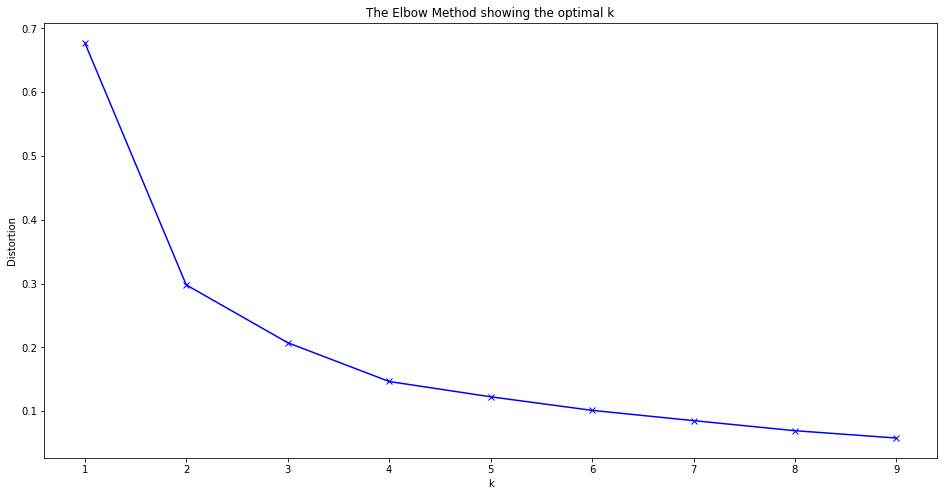

In [138]:
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 

Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

### Perform K Means Clustering with k = 4

In [163]:
k = 4 # set K value, which decides how many clusters the data will be grouped into.

kmeans = KMeans(n_clusters = k, random_state = 0).fit(central_coord) # run Kmeans Clustering

kmeans.labels_ # display the clustering result

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 3, 1, 0, 0, 1, 1, 0, 0, 1, 3, 3, 3, 1,

In [155]:
# add the result to df_central_dists
df_central_dists.insert(0, 'cluster label', kmeans.labels_) #DataFrameName.insert(loc, 'column_name', value, allow_duplicates = False[optional])
df_central_dists

cluster label                                     name  \
0                3       Fukui Japanese Restaurant (福井日本料理)   
1                3            Three Street Restaurant (三玛璐)   
2                3               Xinwang Restaurant (新旺茶餐厅)   
3                3  Nanxiang Steamed Bun Restaurant (南翔馒头店)   
4                3                   Waya Restaurant (蓝方餐厅)   
..             ...                                      ...   
345              1                Thaiful Restaurant (泰湖餐厅)   
346              1  Nanxiang Steamed Bun Restaurant (南翔馒头店)   
347              1                     Xia Restaurant (夏味馆)   
348              1           Taoheung Restaurant (稻香海鮮火鍋酒家)   
349              2          Tao Heung Restaurant (稻香海鮮火鍋酒家)   

              categories        lat         lng district  distance to center  \
0       Sushi Restaurant  31.234410  121.479948  Huangpu                  91   
1     Chinese Restaurant  31.237118  121.477995  Huangpu                 430   
2     Chinese Restaurant  31.237748  121.479868  Huangpu                 462   
3    Dumpling Restaurant  31.228740  121.486932  Huangpu                 862   
4     Chinese Restaurant  31.238266  121.479890  Huangpu                 520   
..                   ...        ...         ...      ...                 ...   
345   Chinese Restaurant  31.224993  121.441330    Putuo                2655   
346  Dumpling Restaurant  31.231306  121.454769    Putuo                3511   
347  Shanghai Restaurant  31.216910  121.434034    Putuo                2882   
348   Dim Sum Restaurant  31.218258  121.453939    Putuo                4067   
349    Hotpot Restaurant  31.211265  121.397587    Putuo                3747   

                           id                                       address  
0    4cbd9032035d236a0d79eb4e                              339 Guangdong Rd  
1    4ef0130a775b121472c58f97                                    黄浦区汉口路413号  
2    4ba35b98f964a520223738e3                      汉口路309号 | 309 Hankou Rd.  
3    4bcd7ffc68f976b0804f6483                        85 Yuyuan Rd | 豫园老街85号  
4    57162eb8cd10c0b025eb22fb                              410 Sichuan M Rd  
..                        ...                                           ...  
345  4ca48885d5a2a143f7685290  南京西路1618号久光百货B1楼 | B1/F, 1618 Nanjing Rd. W.  
346  4bb6e45346d4a593e6f0c6c0                               静安区吴江路269号湟普汇2楼  
347  4b7538dcf964a520a5012ee3                         9 Zhenning Rd | 镇宁路9号  
348  52038e5c498e20186e6914e7                   999 Huaihai M Rd | 淮海中路999号  
349  54473140498eb87372ab39d3                       179 Maotai Rd | 茅台路179号  

[350 rows x 9 columns]

### Visualize the clustering

In [147]:
shanghai_lat_lng = [31.238688, 121.481099] # This is the coordinate of People's Square, which is the core of Shanghai.

central_shanghai = folium.Map(location = [31.238688, 121.481099], zoom_start = 11) # create a map of central districts for clustering

In [148]:
## set color scheme for the cluster

x = np.arange(k) # Return evenly spaced values within a given interval

ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) 
# use matplotlib cm library to create different colors for different ys.
# np.linspace returns evenly spaced numbers over a specified interval.

rainbow = [colors.rgb2hex(i) for i in colors_array]

In [150]:
## add markers to the map
markers_colors = [] # create empty list for markers colors

# superimpose data on the map

for lat, lng, name, cluster in zip(df_central_dists['lat'], df_central_dists['lng'], df_central_dists['name'], df_central_dists['cluster label']): # traverse all designated data in df
    label = ' Cluster ' + str(cluster) # name the label. Example: Cluster 1, Cluster 2...
    label = folium.Popup(label, parse_html = True) # superimpose the cluster on the map
    folium.CircleMarker([lat,lng], # more detailed settings
                        radius = 2, # size of the circle
                        popup = label, # location of the circles
                        color = rainbow[cluster - 1], # color of the frame of the circle
                        fill = True, # fill the circle with color
                        fill_color = rainbow[cluster - 1], # color of the filling
                        fill_opacity = 0.7, # transparency level of the filling
                        parse_html = False #  HTML parsing is basically: taking in HTML code and extracting relevant information like the title of the page, paragraphs in the page, headings in the page, links, bold text etc.
                       ).add_to(central_shanghai) # superimpose all the settings above to the map
                       
central_shanghai

We finally have our clustering map, in which the restaurants are divided into 4 groups.

Now let's decide which cluster we need to explore further based on the business principles we mentioned in the Methodology section:

* Try to avoid locations where there are too many restaurants of the same kind, which means fierce competition;
* Prefer places where most residents have a relatively higher consuming capability;
* Prefer places where the rent is relatively affordable.

---------------------------------------------------------------------------------------------------------------------------------


**Let's exmaine each cluster one by one and decide which one to move forward based on business understanding.**

**Cluster 0**, which is red, seems to be a group of outliers far from downtown Shanghai and therefore deserves no further consideration.

**Cluster 3**, which is yellow, covers the entire area of Huangpu district as well as Lujiazui, which is the central part of Pudongnwhere famous skyscrapers like the Oriental Pearl TV Tower, Shanghai Tower and Internatinal Financial Center are located. This cluster is basically equivalent to center of downtown Shanghai. Even though the purchasing power of Huangpu residents is not as high as housing prices within the area, all dots are densely concentrated within the cluster, which means fierce competition and the average rents might be one of the highest among Shanghai. Since we do not have many expericences of running a restaurant, for risk-control consideration, we will also skip this cluster. 

**Cluster 1**, which is purple,covers almost the entire area of Xuhui, Jing'an, and part of Putuo, Changning and Huangpu district. Limilar to Cluster 3, this cluster also have densely concentrated dots. One of the biggest differences is that it covers a bigger area compared to Cluster 3. Other features like purchasing power, rents, GDP percapita are not very different to Cluser 3. This cluster is OK because the average rents might be relatively lower than Cluster 3 and it covers a wide range of areas, which means diverse customer groups plus decent residents' purchasing power based the results from previous Exploratory Data Analysis. But is the our best choice?


**Cluster 2**, which is blue, covers most areas of Changning and Putuo district. And we decide to move forward with this cluster for the following reasons:

* Most restaurant are not densely concentrated within the area compared to Cluster 2;
* The entre area is relative further than that of Cluster 2, which means average rents might be more affordable;
* People in this cluster also have a decent monthly salary.

---------------------------------------------------------------------------------------------------------------------------------







**We decide to move forward with Cluster 2** and further divide it into different groups using K Means Clustering. 

Considering profitability and the insights we gained so far, we will choose our final neighbourhood base on the following principles:
    

* **the neighbourhood is preferable if it is near to residential areas or business areas;**
* **the neighbourhood is preferable to subway stations;**
* **there are not too many restaurants of the same kind within the neighbourhood.**

And we we will decide what kind of restaurants we will open after the neighbourhood is settled and this is based on the assumption that as long as we have enough budgets, we can find qualified candidates(manager, chef, waiter) of the kind we choose.

OK, now let's create a new dataframe of the blue Cluster 1 we select and use K means clustering method again to find the best neighbourhood to open a new restaurant.



In [191]:
cluster_2 = df_central_dists[df_central_dists['cluster label'] == 2]
cluster_2


cluster label                                   name  \
150              2        福屋 - Fukuya Japanese Restaurant   
151              2        Tao Heung Restaurant (稻香海鮮火鍋酒家)   
152              2      Nanak Indian Restaurant (娜娜可印度餐厅)   
153              2             Xinwang Restaurant (新旺茶餐厅)   
154              2                Jo Jo Restaurant (祖祖餐厅)   
..             ...                                    ...   
331              2                      noodle restaurant   
337              2       Xibei Xibei Restaurant (西贝西北民间菜)   
342              2  Shanghai Music Restaurant (長寧音樂之聲大酒店)   
343              2             Old noodle soup restaurant   
349              2        Tao Heung Restaurant (稻香海鮮火鍋酒家)   

              categories        lat         lng   district  \
150  Japanese Restaurant  31.208384  121.393622  Changning   
151    Hotpot Restaurant  31.211265  121.397587  Changning   
152    Indian Restaurant  31.211198  121.398848  Changning   
153   Chinese Restaurant  31.208054  121.383126  Changning   
154   Chinese Restaurant  31.201993  121.395437  Changning   
..                   ...        ...         ...        ...   
331   Chinese Restaurant  31.238870  121.415143      Putuo   
337  Xinjiang Restaurant  31.220192  121.412413      Putuo   
342     Asian Restaurant  31.214749  121.417149      Putuo   
343     Asian Restaurant  31.238214  121.413591      Putuo   
349    Hotpot Restaurant  31.211265  121.397587      Putuo   

     distance to center                        id  \
150                 360  5288c33a11d2ae8b08dee5bb   
151                 756  54473140498eb87372ab39d3   
152                 870  5a62c86a666116710a38fc18   
153                 667  4b937333f964a5205c4434e3   
154                 962  4d7df9552ff9b60cc567a347   
..                  ...                       ...   
331                 384  5b691b6b237dee0038cc6ad2   
337                2236  4f62bb6fe4b08b476dcd68bd   
342                2755  5062dafbe4b0d29ce811e249   
343                 544  5b67c653e97dfb002cfc1329   
349                3747  54473140498eb87372ab39d3   

                          address  
150                           NaN  
151       179 Maotai Rd | 茅台路179号  
152       179 Maotai Rd | 茅台路179号  
153     仙霞路649号 | 649 Xianxia Rd.  
154            1480 Hongqiao Road  
..                            ...  
331                           NaN  
337  1018 Changing Road | 长宁路1018  
342                       武夷路439號  
343                           NaN  
349       179 Maotai Rd | 茅台路179号  

[71 rows x 9 columns]

Let's check if the cluster we filtered is correct.

In [178]:
cluster_2.name

latitude = 31.238688
longitude = 121.481099
# This is the coordinate of People's Square in Huangpu district

venues_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
folium.CircleMarker(
    [latitude, longitude],
    radius = 15,
    color = 'red',
    popup = 'Shanghai',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6).add_to(venues_map)

for lat, lng, label in zip(cluster_2.lat, cluster_2.lng, cluster_2.categories):
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(venues_map)
        
venues_map

No problems. Let's move on.

## Break down Cluster 2 using K-Means Clustering

In [168]:
### Find the optimal value for K using Elbow method
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [187]:
# Get coordinates for cluster 2
cluster_2_coord = cluster_2.drop(['name', 'categories', 'district', 'distance to center', 'id', 'address'], 1)
cluster_2_coord

cluster label        lat         lng
150              2  31.208384  121.393622
151              2  31.211265  121.397587
152              2  31.211198  121.398848
153              2  31.208054  121.383126
154              2  31.201993  121.395437
..             ...        ...         ...
331              2  31.238870  121.415143
337              2  31.220192  121.412413
342              2  31.214749  121.417149
343              2  31.238214  121.413591
349              2  31.211265  121.397587

[71 rows x 3 columns]

In [182]:
### Run K-Means with a range of k
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(cluster_2_coord)
    distortions.append(kmeanModel.inertia_)

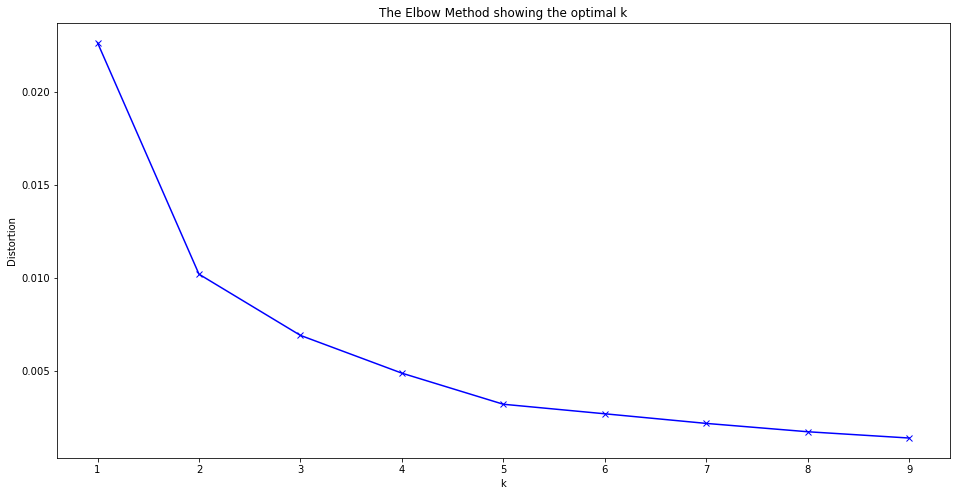

In [183]:
#Plotting the distortions of k-means
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The best k value for cluster 2 is 5

### Perform K Means Clustering with K = 5

In [188]:
k = 5 # set K value, which decides how many clusters the data will be grouped into.

kmeans = KMeans(n_clusters = k, random_state = 0).fit(cluster_2_coord) # perform Kmeans Clustering

kmeans.labels_ # display the clustering result


array([0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 3, 0, 2, 4, 4, 0, 3, 2, 3, 2, 0, 4, 4, 4, 2, 2, 2, 0, 3, 0, 2,
       4, 4, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 0])

In [195]:
# add the result to cluster_2

cluster_2.insert(0, 'cluster result', kmeans.labels_) # DataFrameName.insert(loc, 'column_name', value, allow_duplicates = False[optional])
cluster_2

cluster result  cluster number                                   name  \
150               0               2        福屋 - Fukuya Japanese Restaurant   
151               0               2        Tao Heung Restaurant (稻香海鮮火鍋酒家)   
152               0               2      Nanak Indian Restaurant (娜娜可印度餐厅)   
153               3               2             Xinwang Restaurant (新旺茶餐厅)   
154               0               2                Jo Jo Restaurant (祖祖餐厅)   
..              ...             ...                                    ...   
331               1               2                      noodle restaurant   
337               2               2       Xibei Xibei Restaurant (西贝西北民间菜)   
342               2               2  Shanghai Music Restaurant (長寧音樂之聲大酒店)   
343               1               2             Old noodle soup restaurant   
349               0               2        Tao Heung Restaurant (稻香海鮮火鍋酒家)   

              categories        lat         lng   district  \
150  Japanese Restaurant  31.208384  121.393622  Changning   
151    Hotpot Restaurant  31.211265  121.397587  Changning   
152    Indian Restaurant  31.211198  121.398848  Changning   
153   Chinese Restaurant  31.208054  121.383126  Changning   
154   Chinese Restaurant  31.201993  121.395437  Changning   
..                   ...        ...         ...        ...   
331   Chinese Restaurant  31.238870  121.415143      Putuo   
337  Xinjiang Restaurant  31.220192  121.412413      Putuo   
342     Asian Restaurant  31.214749  121.417149      Putuo   
343     Asian Restaurant  31.238214  121.413591      Putuo   
349    Hotpot Restaurant  31.211265  121.397587      Putuo   

     distance to center                        id  \
150                 360  5288c33a11d2ae8b08dee5bb   
151                 756  54473140498eb87372ab39d3   
152                 870  5a62c86a666116710a38fc18   
153                 667  4b937333f964a5205c4434e3   
154                 962  4d7df9552ff9b60cc567a347   
..                  ...                       ...   
331                 384  5b691b6b237dee0038cc6ad2   
337                2236  4f62bb6fe4b08b476dcd68bd   
342                2755  5062dafbe4b0d29ce811e249   
343                 544  5b67c653e97dfb002cfc1329   
349                3747  54473140498eb87372ab39d3   

                          address  
150                           NaN  
151       179 Maotai Rd | 茅台路179号  
152       179 Maotai Rd | 茅台路179号  
153     仙霞路649号 | 649 Xianxia Rd.  
154            1480 Hongqiao Road  
..                            ...  
331                           NaN  
337  1018 Changing Road | 长宁路1018  
342                       武夷路439號  
343                           NaN  
349       179 Maotai Rd | 茅台路179号  

[71 rows x 10 columns]

### Visualize the clustering

In [206]:
cluster_2_lat_lng = [31.214948, 121.408694]# This is the coordinate of Jinhongqiao Shopping Mall, which is the core of Changning.

cluster_2_map = folium.Map(location=[31.214948, 121.408694], zoom_start = 12) # create a map of cluster 2 

In [207]:
## set color scheme for the cluster

x = np.arange(k) 
# Return evenly spaced values within a given interval

ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys))) 
# use matplotlib cm library to create different colors for different ys.
# np.linspace returns evenly spaced numbers over a specified interval.

rainbow = [colors.rgb2hex(i) for i in colors_array]

In [209]:
## add markers to the map
markers_colors = [] # create empty list for markers colors

# superimpose data on the map

for lat,lng,name, cluster in zip(cluster_2['lat'], cluster_2['lng'], cluster_2['name'], cluster_2['cluster result']): # traverse all designated data in df
    label = ' Cluster ' + str(cluster) # name the label. Example: Cluster 1, Cluster 2...
    label = folium.Popup(label, parse_html = True) # superimpose the cluster on the map
    folium.CircleMarker([lat, lng], # more detailed settings
                        radius = 2, # size of the circle
                        popup = label, # location of the circle
                        color = rainbow[cluster - 1], # color of the frame of the circle
                        fill = True, # fill the circle with color
                        fill_color = rainbow[cluster - 1], # color of the filling
                        fill_opacity = 0.7, # transparency level of the filling
                        parse_html = False #  HTML parsing is basically: taking in HTML code and extracting relevant information like the title of the page, paragraphs in the page, headings in the page, links, bold text etc.
                       ).add_to(cluster_2_map) # superimpose all the settings above to the map
                       
cluster_2_map

## How about the restaurants categories in this cluster?

In [216]:
cluster_2_class = pd.DataFrame(cluster_2.groupby(['categories']).size()).astype(int)
cluster_2_class = cluster_2_class.rename(columns = {0: "number"})
cluster_2_class.reset_index(inplace = True)
cluster_2_class.sort_values(by = ['number'], ascending = False, inplace = True)
cluster_2_class.reset_index(inplace = True)
cluster_2_class.drop(columns = ['index'], inplace = True)
cluster_2_class


categories  number
0     Chinese Restaurant      21
1   Cantonese Restaurant       8
2    Japanese Restaurant       6
3       Asian Restaurant       5
4    American Restaurant       3
5    Xinjiang Restaurant       3
6   Fast Food Restaurant       3
7     Seafood Restaurant       3
8   Hong Kong Restaurant       3
9   Taiwanese Restaurant       2
10   Shanghai Restaurant       2
11     Hotpot Restaurant       2
12            Restaurant       1
13    Sauna / Steam Room       1
14     Indian Restaurant       1
15     Korean Restaurant       1
16    Italian Restaurant       1
17     Fujian Restaurant       1
18                  Food       1
19                 Diner       1
20        Cha Chaan Teng       1
21   Zhejiang Restaurant       1

We can see that the top 5 categories are Chinese, Cantonese, Japanese, Asian and American.

By exploring **2.11 RESIDENT FOREIGNERS IN SHANGHAI IN MAIN YEARS** (http://tjj.sh.gov.cn/tjnj/nj19.htm?d1=2019tjnje/E0211.htm), we can see that there're an overwhelming number of Japanese in Shanghai and a lot of them are actually working or living in Changning district. 

However, there are only 6 Japanese restaurants in this cluster, which is kind of under-supply and also means low competition. 

Considering that Japanese cuisine, compared to Asian and American food, is also loved by many Chinese and foreigners from western countries, **we decide to open a new Japanese restaurant**.

Now that the category is decided, where should we start our new business?


Considering profitability and the insights we gained so far, we will choose our final neighbourhood based on the following principles:

----------------------------------------------------------------------

* **the neighbourhood is preferable if it is near to residential areas or business areas;**
* **the neighbourhood is preferable to subway stations;**
* **there are not too many restaurants of the same kind within the neighbourhood;** 
* **rents are generally affordable.**
----------------------------------------------------------------------

### Let's examine each cluster one by one.

In [217]:
cluster_2_map

----------------------------------------------------------------------
**Cluster 3 (Green):** 
An outlier without distinctive features.

**Cluster 4 (Orange):**
Covers most of the areas usually called by Shanghainese as 'Gubei', which is historically a wealthy community. Not densely-populated. Filled with residential areas. No big shopping malls or business areas nearby and good access to subway stations.


**Cluster 0 (Red):**
The center of all 5 clusters. Also a sub-regional commercial center surrounded by a lot of shopping malls, business buldings and residential areas. Easy access to subway. Potentially higher rents.


**Cluster 1 (Purple）:**
A sub-regional commercial center with the magnificant Global Harbor Mall and East China Normal University nearby.  Easy access to subway. Potentially lower rents.


**Cluster 2 (Blue):**
A famous sub-regional commercial center near Zhongshan Park. Big shopping malls and business areas nearby. Easy access to subway. Potentially higher rents.

----------------------------------------------------------------------


Let's quantify the features of each cluster to decide which one is the final winner. 

Here l select 7 most distinctive features arbitrarily bases on business understanding. They are:

* **Rents (lower rent gets higher mark)**
* **Proximity to business areas(the closer the higher mark)**
* **Proximity to residential areas(the closer the higher mark)**
* **Proximity to shopping malls(the further the higher mark)**
* **Proximity to subway stations(the closer the higher mark)**
* **Number of competitors within the cluster(less number gets higher mark)**
* **Purchasing power of residents nearby(greater purchasing power gets higher mark)**

The rating mark will be ranging from 0 to 5, and the total mark will be calculated.


In [264]:
cluster0 = cluster_2[cluster_2['cluster result'] == 0]
cluster0

cluster0_class = pd.DataFrame(cluster0.groupby(['categories']).size()).astype(int)
cluster0_class = cluster0_class.rename(columns = {0: "number"})
cluster0_class.reset_index(inplace = True)
cluster0_class.sort_values(by = ['number'], ascending = False, inplace = True)
cluster0_class.reset_index(inplace = True)
cluster0_class.drop(columns = ['index'], inplace = True)
cluster0_class



categories  number
0     Chinese Restaurant       5
1    Japanese Restaurant       5
2    American Restaurant       2
3      Hotpot Restaurant       2
4     Seafood Restaurant       2
5   Cantonese Restaurant       1
6                  Diner       1
7                   Food       1
8      Fujian Restaurant       1
9      Indian Restaurant       1
10    Italian Restaurant       1
11     Korean Restaurant       1
12  Taiwanese Restaurant       1

There are 5 Japanese restaurants in Cluster 0.


In [265]:
cluster1 = cluster_2[cluster_2['cluster result'] == 1]
cluster1

cluster1_class = pd.DataFrame(cluster1.groupby(['categories']).size()).astype(int)
cluster1_class = cluster1_class.rename(columns = {0: "number"})
cluster1_class.reset_index(inplace = True)
cluster1_class.sort_values(by = ['number'], ascending = False, inplace = True)
cluster1_class.reset_index(inplace = True)
cluster1_class.drop(columns = ['index'], inplace = True)
cluster1_class

categories  number
0    Chinese Restaurant       3
1  Cantonese Restaurant       2
2      Asian Restaurant       1
3   Xinjiang Restaurant       1

In [266]:
cluster2 = cluster_2[cluster_2['cluster result'] == 2]
cluster2

cluster2_class = pd.DataFrame(cluster2.groupby(['categories']).size()).astype(int)
cluster2_class = cluster2_class.rename(columns = {0: "number"})
cluster2_class.reset_index(inplace = True)
cluster2_class.sort_values(by = ['number'], ascending = False, inplace = True)
cluster2_class.reset_index(inplace = True)
cluster2_class.drop(columns = ['index'], inplace = True)
cluster2_class

categories  number
0    Chinese Restaurant       6
1      Asian Restaurant       4
2  Fast Food Restaurant       3
3  Cantonese Restaurant       2
4  Hong Kong Restaurant       2
5   Shanghai Restaurant       2
6        Cha Chaan Teng       1
7   Japanese Restaurant       1
8   Xinjiang Restaurant       1
9   Zhejiang Restaurant       1

There are 1 Japanese restaurants in Cluster 2.

In [267]:
cluster3 = cluster_2[cluster_2['cluster result'] == 3]
cluster3

cluster3_class = pd.DataFrame(cluster3.groupby(['categories']).size()).astype(int)
cluster3_class = cluster3_class.rename(columns = {0: "number"})
cluster3_class.reset_index(inplace = True)
cluster3_class.sort_values(by = ['number'], ascending = False, inplace = True)
cluster3_class.reset_index(inplace = True)
cluster3_class.drop(columns = ['index'], inplace = True)
cluster3_class

categories  number
0  Cantonese Restaurant       3
1    Chinese Restaurant       1
2            Restaurant       1
3  Taiwanese Restaurant       1
4   Xinjiang Restaurant       1

There are 0 Japanese restaurants in Cluster 3.

In [268]:
cluster4 = cluster_2[cluster_2['cluster result'] == 4]
cluster4

cluster4_class = pd.DataFrame(cluster4.groupby(['categories']).size()).astype(int)
cluster4_class = cluster4_class.rename(columns = {0: "number"})
cluster4_class.reset_index(inplace = True)
cluster4_class.sort_values(by = ['number'], ascending = False, inplace = True)
cluster4_class.reset_index(inplace = True)
cluster4_class.drop(columns = ['index'], inplace = True)
cluster4_class

categories  number
0    Chinese Restaurant       6
1   American Restaurant       1
2  Hong Kong Restaurant       1
3    Sauna / Steam Room       1
4    Seafood Restaurant       1

In [219]:
cluster_2_map

In [280]:
rating_data = {
    'Cluster':['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
    'Rents':[2, 4, 2, 5,2], 
    'Proximity to business areas':[5, 3, 4, 2,3],
    'Proximity to residential areas':[4, 5, 4, 5,5],
    'Proximity to shopping malls':[2, 5, 2, 5,3],
    'Proximity to subway stations':[5, 4, 5,3, 5],
    'Number of competitors within the cluster':[1, 5, 4, 5,5],
    'Purchasing power of residents nearby':[4, 3, 4, 3,5]
} 
cluster_ratings = pd.DataFrame(data = rating_data)
cluster_ratings

Cluster  Rents  Proximity to business areas  \
0  Cluster 0      2                            5   
1  Cluster 1      4                            3   
2  Cluster 2      2                            4   
3  Cluster 3      5                            2   
4  Cluster 4      2                            3   

   Proximity to residential areas  Proximity to shopping malls  \
0                               4                            2   
1                               5                            5   
2                               4                            2   
3                               5                            5   
4                               5                            3   

   Proximity to subway stations  Number of competitors within the cluster  \
0                             5                                         1   
1                             4                                         5   
2                             5                                         4   
3                             3                                         5   
4                             5                                         5   

   Purchasing power of residents nearby  
0                                     4  
1                                     3  
2                                     4  
3                                     3  
4                                     5

In [282]:
cluster_ratings['Total score'] = cluster_ratings.sum(1)
cluster_ratings

Cluster  Rents  Proximity to business areas  \
0  Cluster 0      2                            5   
1  Cluster 1      4                            3   
2  Cluster 2      2                            4   
3  Cluster 3      5                            2   
4  Cluster 4      2                            3   

   Proximity to residential areas  Proximity to shopping malls  \
0                               4                            2   
1                               5                            5   
2                               4                            2   
3                               5                            5   
4                               5                            3   

   Proximity to subway stations  Number of competitors within the cluster  \
0                             5                                         1   
1                             4                                         5   
2                             5                                         4   
3                             3                                         5   
4                             5                                         5   

   Purchasing power of residents nearby  Total score  
0                                     4           23  
1                                     3           29  
2                                     4           25  
3                                     3           28  
4                                     5           28

In [283]:
cluster_ratings.sort_values(by=['Total score'], ascending=False, inplace=True)
cluster_ratings

Cluster  Rents  Proximity to business areas  \
1  Cluster 1      4                            3   
3  Cluster 3      5                            2   
4  Cluster 4      2                            3   
2  Cluster 2      2                            4   
0  Cluster 0      2                            5   

   Proximity to residential areas  Proximity to shopping malls  \
1                               5                            5   
3                               5                            5   
4                               5                            3   
2                               4                            2   
0                               4                            2   

   Proximity to subway stations  Number of competitors within the cluster  \
1                             4                                         5   
3                             3                                         5   
4                             5                                         5   
2                             5                                         4   
0                             5                                         1   

   Purchasing power of residents nearby  Total score  
1                                     3           29  
3                                     3           28  
4                                     5           28  
2                                     4           25  
0                                     4           23

## Finally, we have our winner: 

## **Cluster 1** with a total score of 29!

Now, let's find our neighborhood in this cluster.

In [427]:
# Filter all neighbourhoods in Changning from dist_neigh
Changning_neigh = dist_neigh[dist_neigh['district'] == 'Changning']
Changning_neigh

district         neighbourhood_eng neighbourhood_cn   latitude  \
38  Changning      Beixinjing, Shanghai              北新泾  31.224047   
39  Changning           Gubei, Shanghai               古北  31.192432   
40  Changning        Hongqiao, Shanghai               虹桥  31.214744   
41  Changning        Tianshan, Shanghai               天山  31.212086   
42  Changning          Xijiao, Shanghai               西郊  31.203638   
43  Changning         Xianxia, Shanghai               仙霞  31.208303   
44  Changning          Xinhua, Shanghai              新华路  31.211350   
45  Changning   Zhenning Road, Shanghai              镇宁路  31.224697   
46  Changning       Changfeng, Shanghai               长风  31.236050   
47  Changning  Zhongshan Park, Shanghai             中山公园  31.224321   

     longitude  
38  121.335202  
39  121.402510  
40  121.409526  
41  121.402178  
42  121.375351  
43  121.394095  
44  121.426495  
45  121.431241  
46  121.417347  
47  121.422869

### Visualize all neighbourhoods

In [432]:
cluster1_lat_lng = [31.239446, 121.419129] # This is the coordinate of Global Harbor Mall, which is the core of Cluster 1.

cluster1_map = folium.Map(location=[31.239446, 121.419129] , zoom_start=13) # create a map of cluster 1

# add a red circle marker to represent the Cluster 1
folium.CircleMarker(
    [31.239446, 121.419129],
    radius = 10,
    color = 'red',
    popup = 'Cluster 1',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(cluster1_map)

# add all neighbourhood as blue circle markers
for lat, lng, label in zip(Changning_neigh.latitude, Changning_neigh.longitude, Changning_neigh.neighbourhood_eng):
    folium.CircleMarker(
        [lat, lng],
        radius = 50,
        color = 'blue',
        popup = label,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.1
    ).add_to(cluster1_map)

# display map
cluster1_map








### As seen on the map, **Changfeng** is the nearest neighbourhood to Cluster 1. 

### As such, we can now conclude that:

* The kind of restaurant we will open is **Japanese restaurant**;

* Our new restaurant will be in the neighbourhood of **Changfeng** located in Changning district,Shanghai.


## Results and Discussion <a name="results"></a>

Now that we have already decided to open a new Japanese restaurant in Changfeng neighbourhood, let's see if we could find more insights from everything we have done so far to ensure our business could survive and achieve maximum profit.

On the bright side, we are lucky to find the answers to the questions we ask at the beginning of this project. And the rationale behind how we land our final decision seems all reasonable. We also find a lot of interesting stories about the 7 districts and their residents in Shanghai.

However, we did not come to this stage easily, so let's discuss the limitations of our findings and any major problems we have encounted during this whole project.

First, the results are based on the data we gather from multiple channel, some of which offcial and others not. This means our results could be biased and far from executable since everything we've done in this project is based on data that are unchecked and a lot of assumptions that seem to be logically correct. Everything we have achieved in this project only serve to provide insights for us before we actually make a real business decision. And there are certainly more work to do like field explorations(average rents, price range), consulting experts to ensure our business stay healthy and thrive.

Second, we certainly spent a lot of time gathering, cleaning and formatting data before data analysis actually begun. This makes sense since everything we have done in this project is based on data and we need to try our best to ensure that the foundation of our project to be real,accurate and complete.

Third, we certainly see that the FourSquare API is far from perfect since even if we tries our best to ensure the name our neighbourhoods to be correct, we still have certain number of missing coordinates.

Finally, we should remember that results in this project need to be updated from time to time since our data are changing every day. We should always think more in terms of what tools to use to solve our problems. We should always be flexible to switch between tools and always ask the two most important questions in a data science project: 
Does this tool actually help me achieve what l need?
Can l achieve the same goal more efficiently by using differents tools or different methods?


## Conclusion <a name="conclusion"></a>

In this project, we utilized multiple data science tools like Python, MySQL and FourSquare API to find out the best neighhourhood in downtown Shanghai to open a new restaurant. Along the way, we also generated useful insights by analyzing the demographic information of 7 central distircts in Shanghai. By going through the full cycle of data science using multiple tools, we formed a deeper understanding of what data, programming and business are all about. 